# Humam Activity Detection 

## 1 : Import Libraries 

In [164]:
# Importing Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [165]:
# Models and Utils 
# Utils
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV 

# Models 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 

# Evaluation Metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## 2 : Data Importing and Analysis 

In [166]:
# Loading Data 
df = pd.read_csv("/kaggle/input/mobile-health/mhealth_raw_data.csv")
df.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

In [167]:
# Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [168]:
# Statistical Summary of  Numerical Columns
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [169]:
# Checking Null values 
df.isna().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [170]:
# Checking for duplicates 
df.duplicated().sum()

0

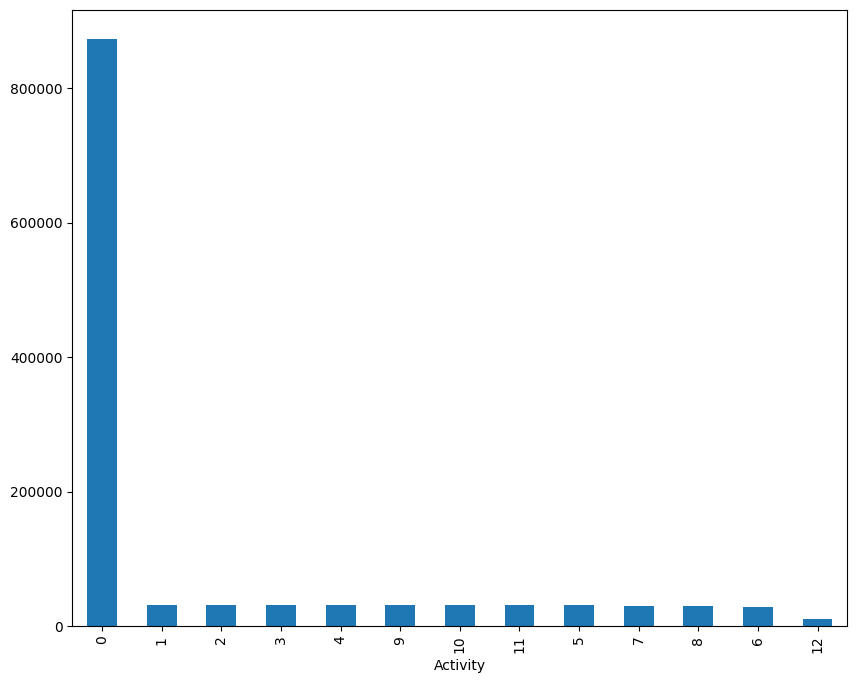

In [171]:
# Distribution Plot :  Activity 
plt.figure(figsize = (10 , 8))
df["Activity"].value_counts().plot.bar()
plt.show()

In [172]:
#As the activity higher is for 0 
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

In [173]:
# sampling the data / adjusting 0 for other activities 
data_activity_0 = data_activity_0.sample(n = 40000)
df =  pd.concat([data_activity_0, data_activity_else])

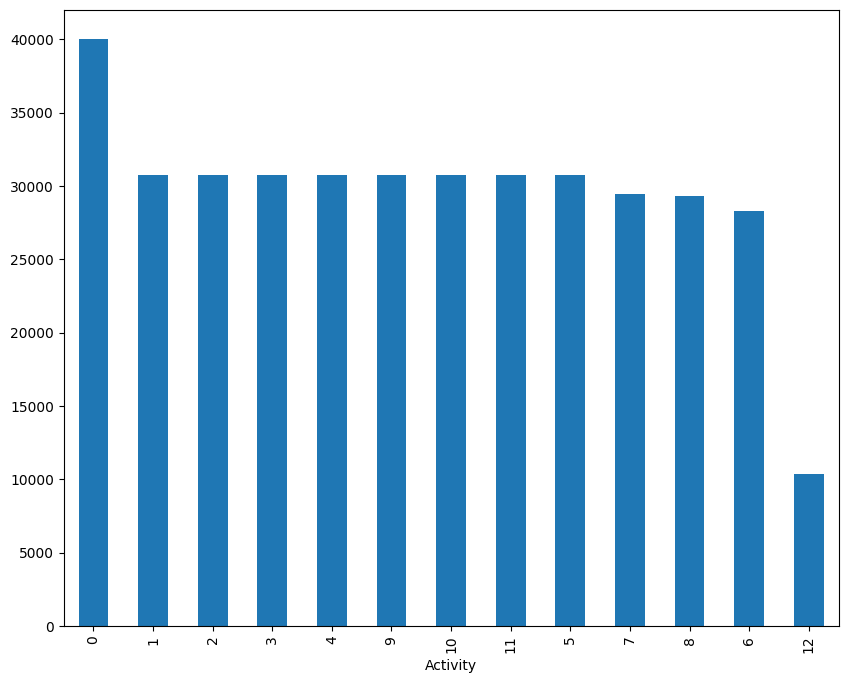

In [174]:
# Distribution Again 
plt.figure(figsize = (10 , 8))
df["Activity"].value_counts().plot.bar()
plt.show()

In [175]:
len(df)

383195

## 3 : EDA 

In [176]:
# Purpose : For Visual analysis
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

=====================Standing still (1 min) - a==========


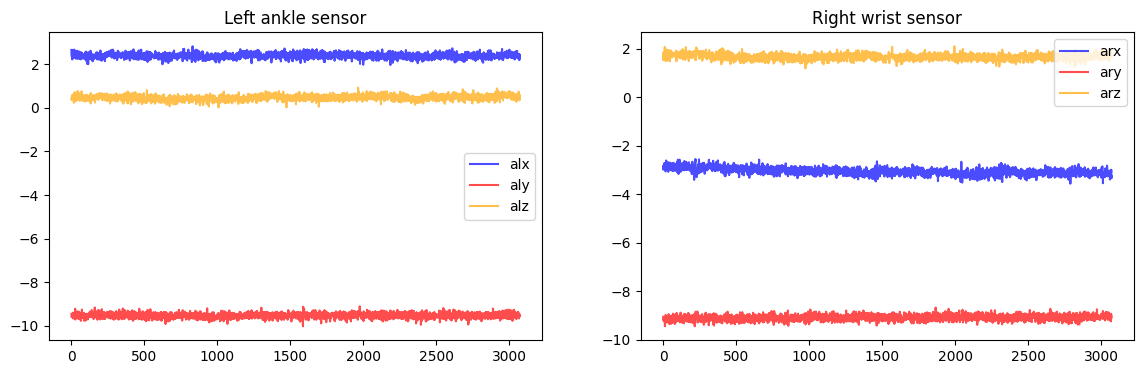

=====================Standing still (1 min) - g==========


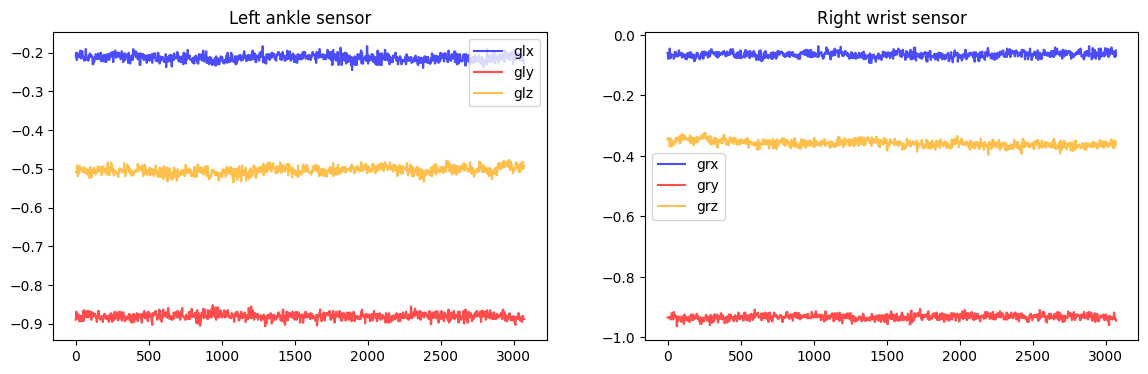

=====================Sitting and relaxing (1 min) - a==========


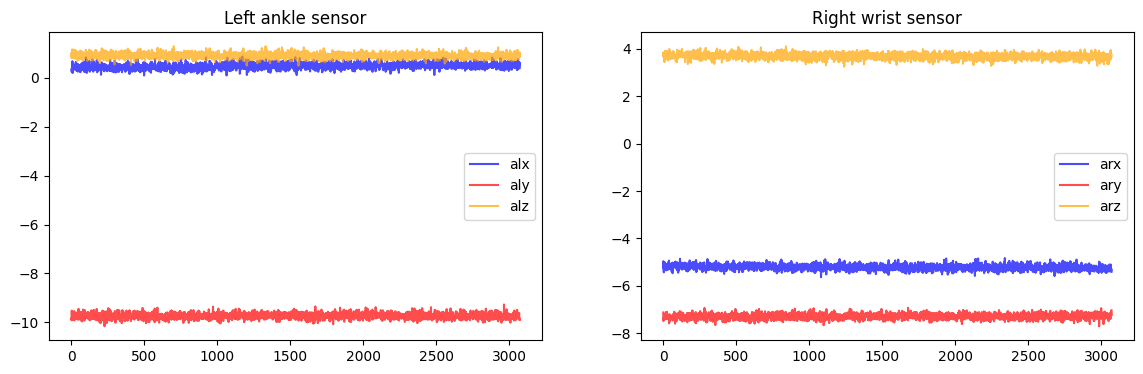

=====================Sitting and relaxing (1 min) - g==========


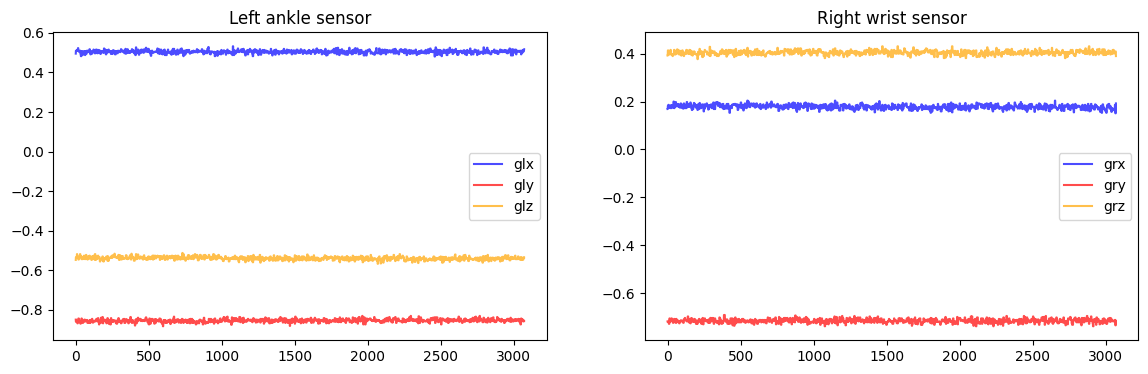

=====================Lying down (1 min) - a==========


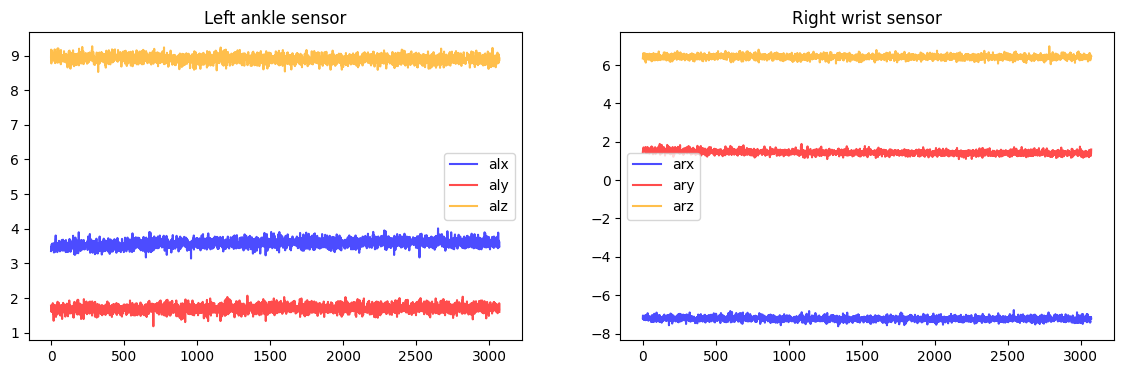

=====================Lying down (1 min) - g==========


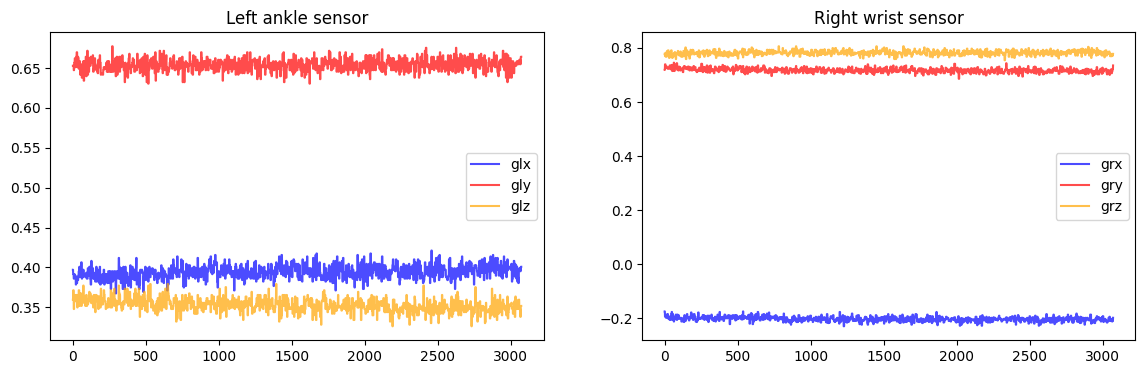

=====================Walking (1 min) - a==========


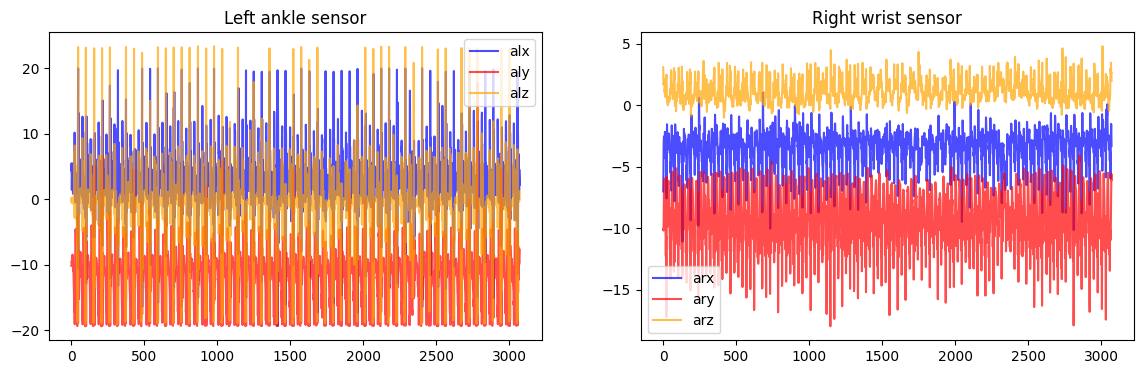

=====================Walking (1 min) - g==========


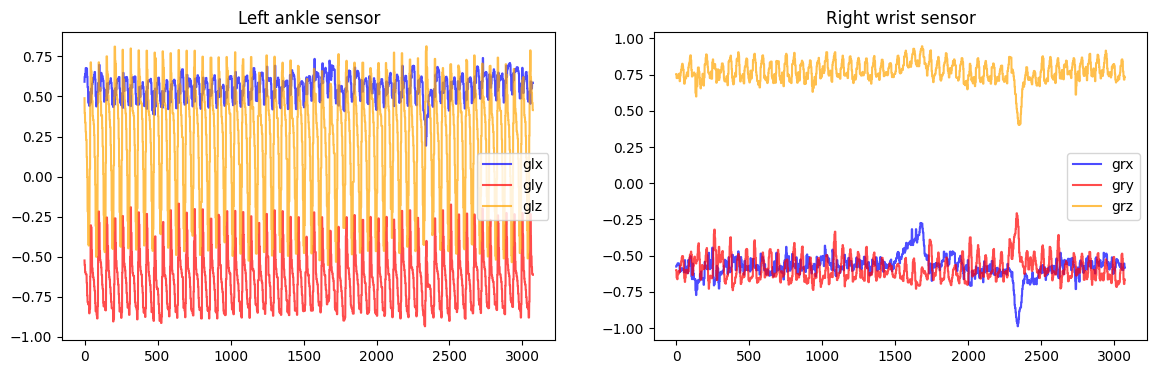

=====================Climbing stairs (1 min) - a==========


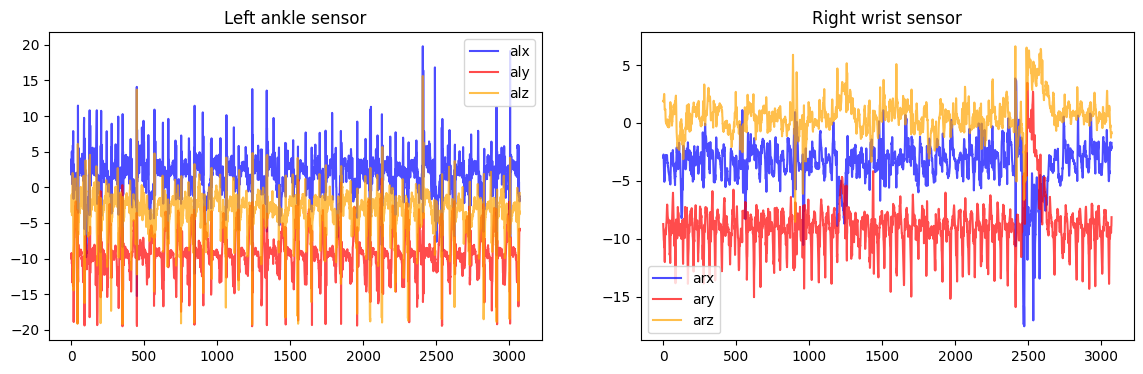

=====================Climbing stairs (1 min) - g==========


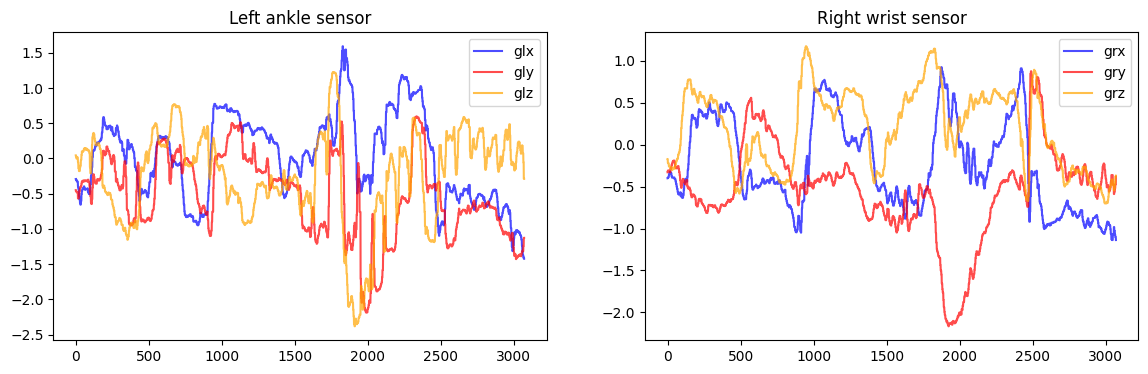

=====================Waist bends forward (20x) - a==========


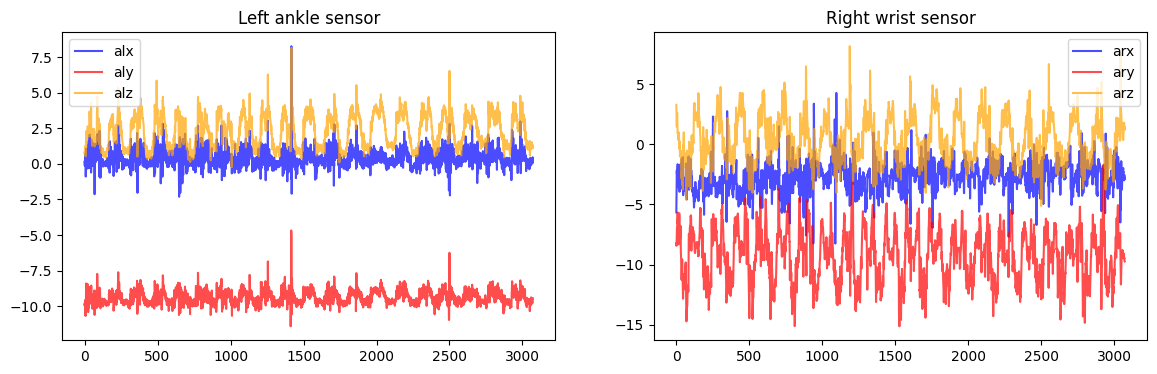

=====================Waist bends forward (20x) - g==========


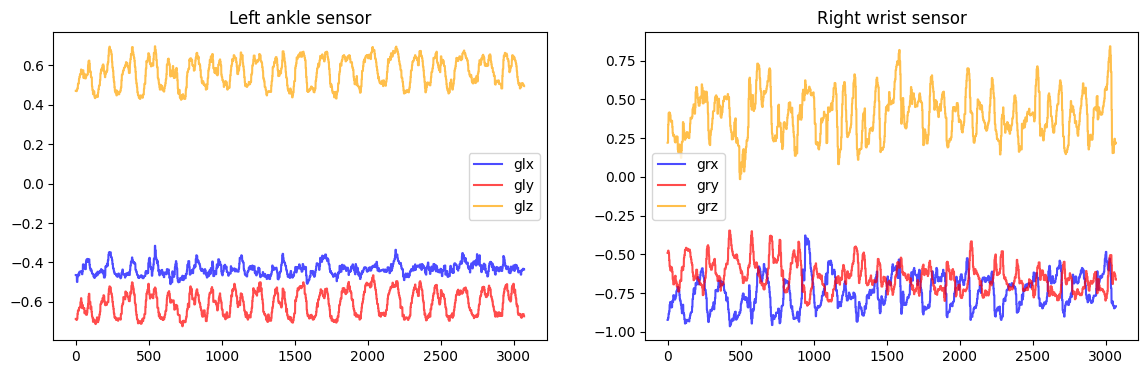

=====================Frontal elevation of arms (20x) - a==========


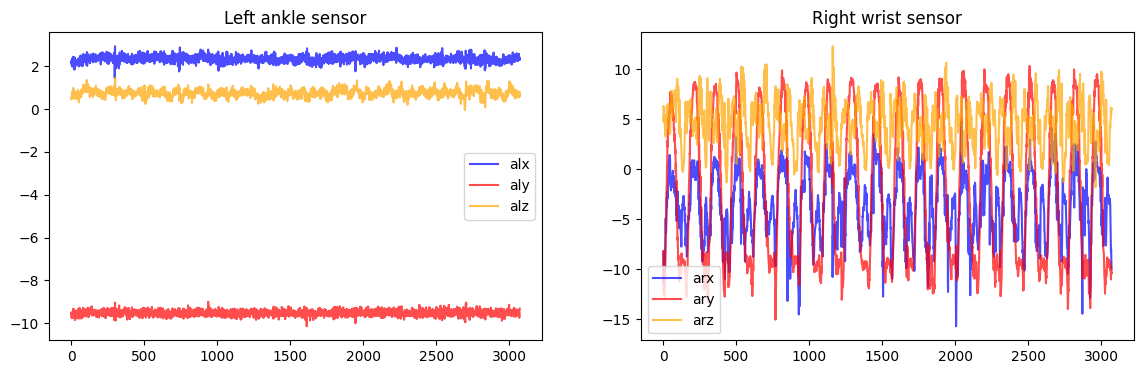

=====================Frontal elevation of arms (20x) - g==========


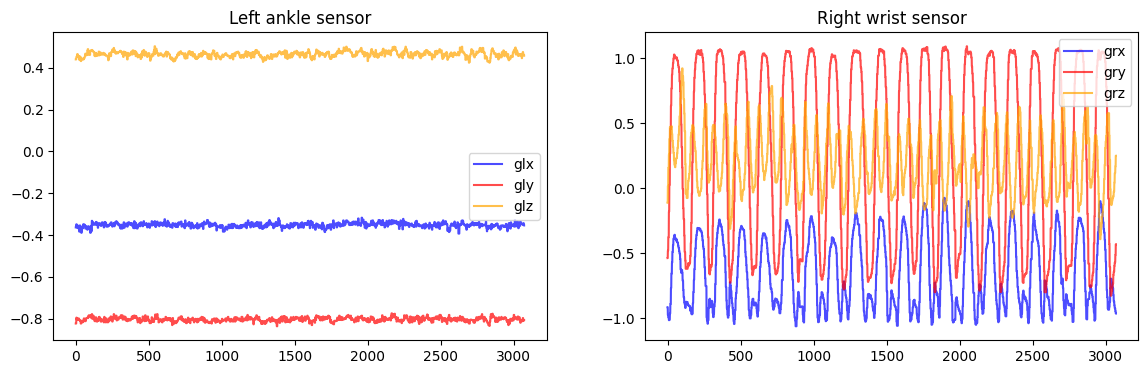

=====================Knees bending (crouching) (20x) - a==========


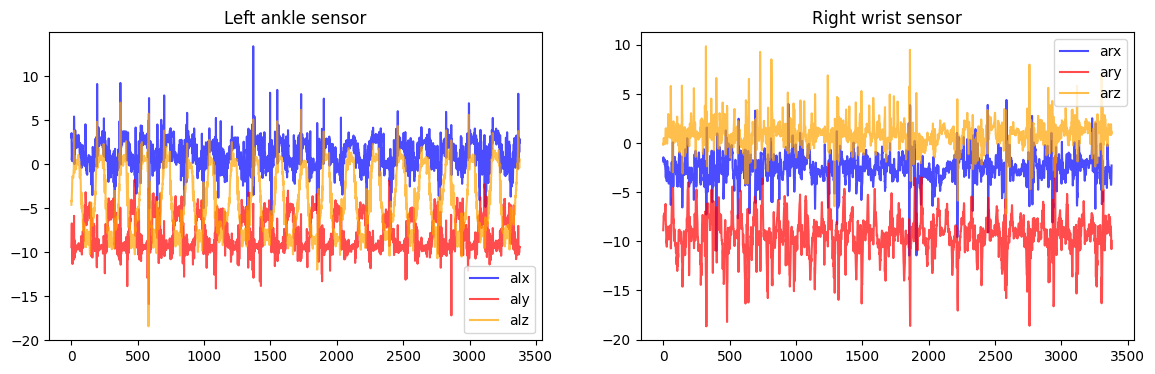

=====================Knees bending (crouching) (20x) - g==========


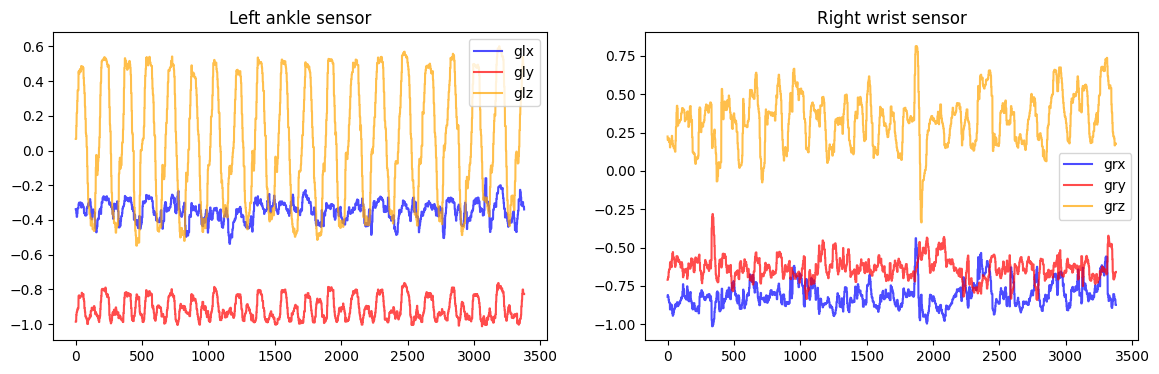

=====================Cycling (1 min) - a==========


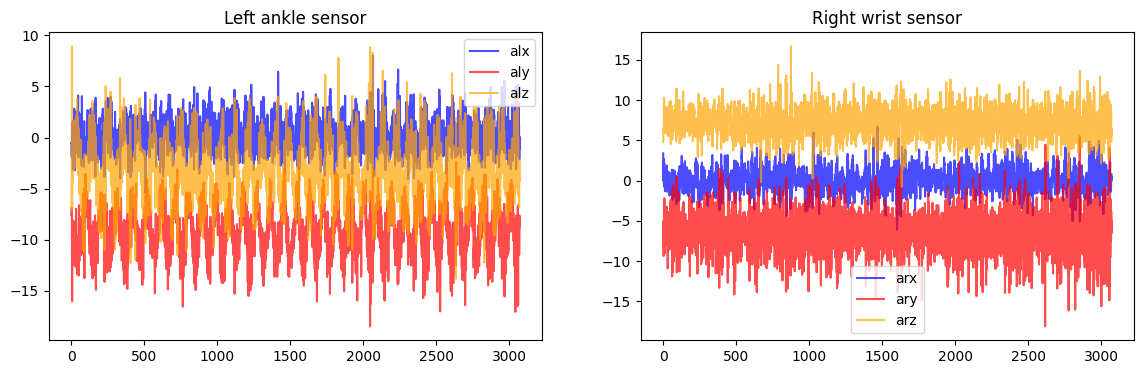

=====================Cycling (1 min) - g==========


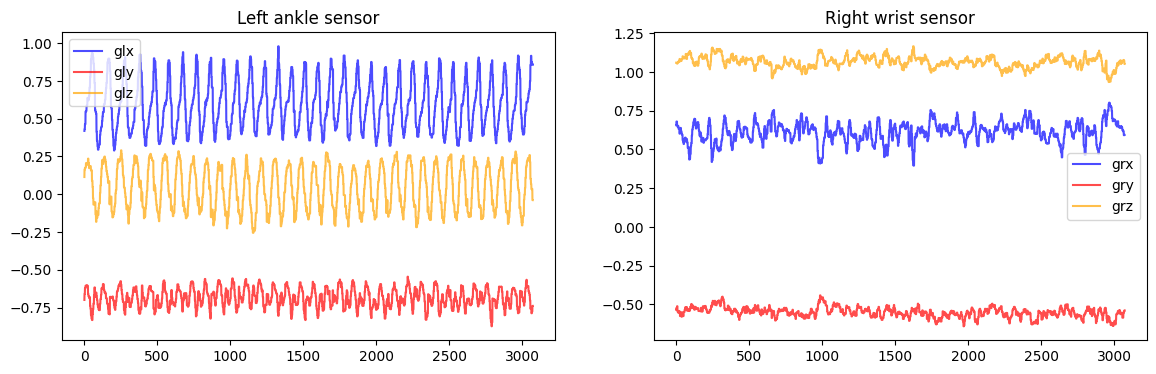

=====================Jogging (1 min) - a==========


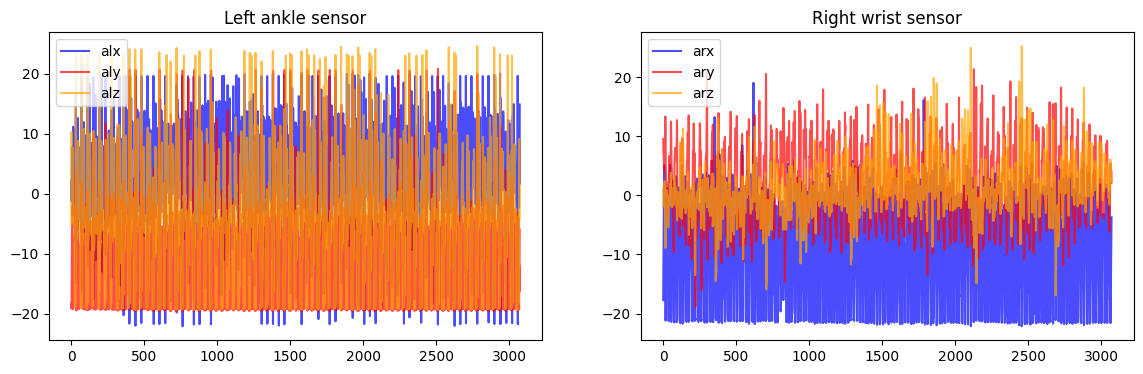

=====================Jogging (1 min) - g==========


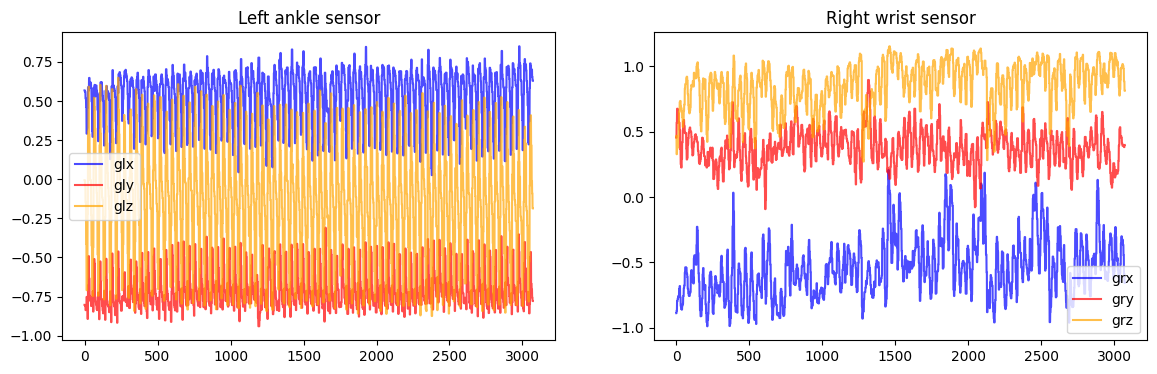

=====================Running (1 min) - a==========


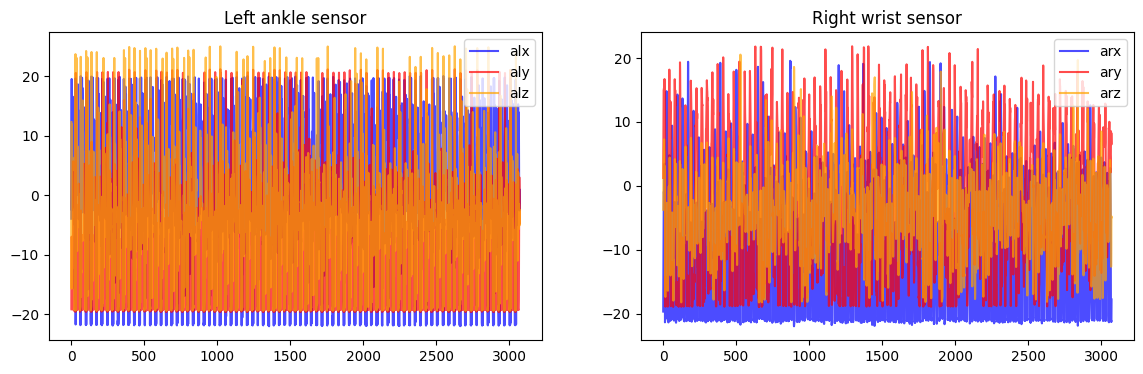

=====================Running (1 min) - g==========


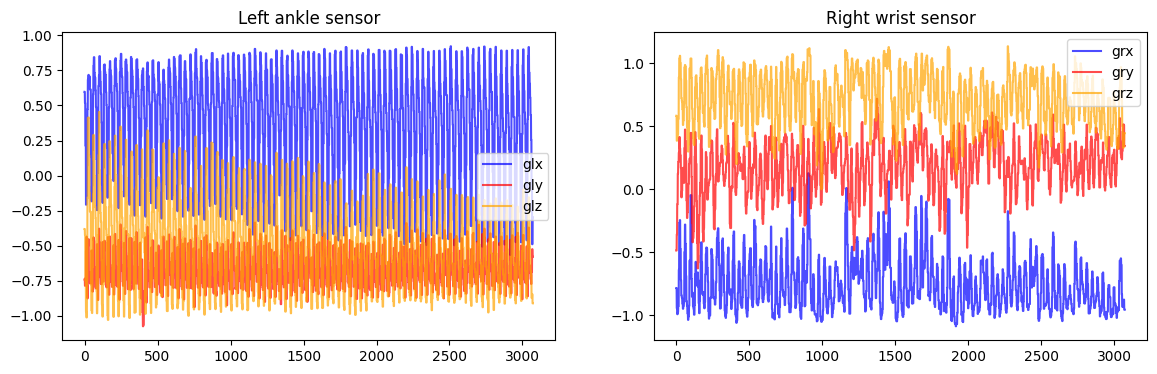

=====================Jump front & back (20x) - a==========


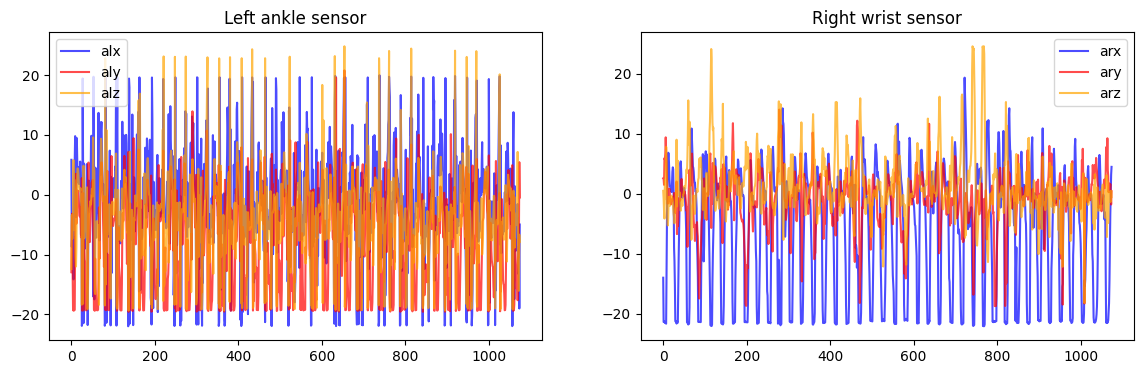

=====================Jump front & back (20x) - g==========


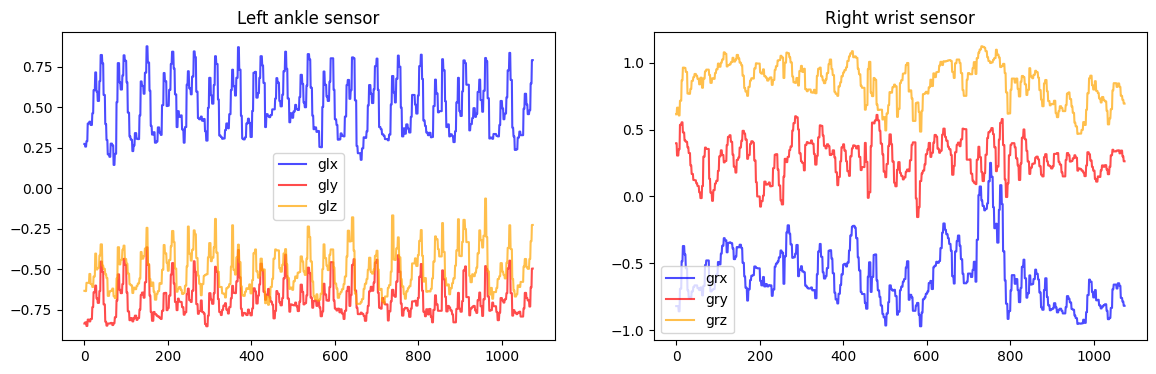

In [177]:
# Plotting
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"====================={activity_label[i]} - {r}==========")
        plt.figure(figsize = (14,4))
        # Left ankle
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        # Right ankle
        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ry"], color='red', alpha=0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rz"], color = 'orange', alpha= 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()


=====================Standing still (1 min) - a==========


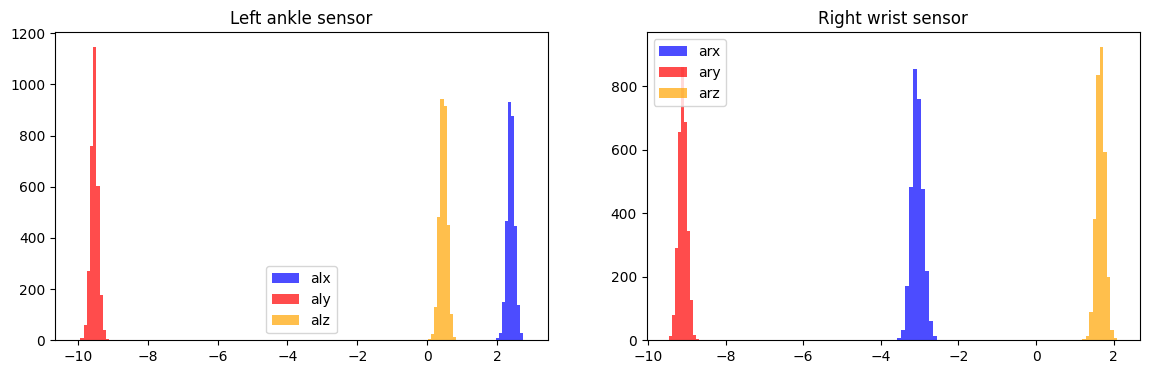

=====================Standing still (1 min) - g==========


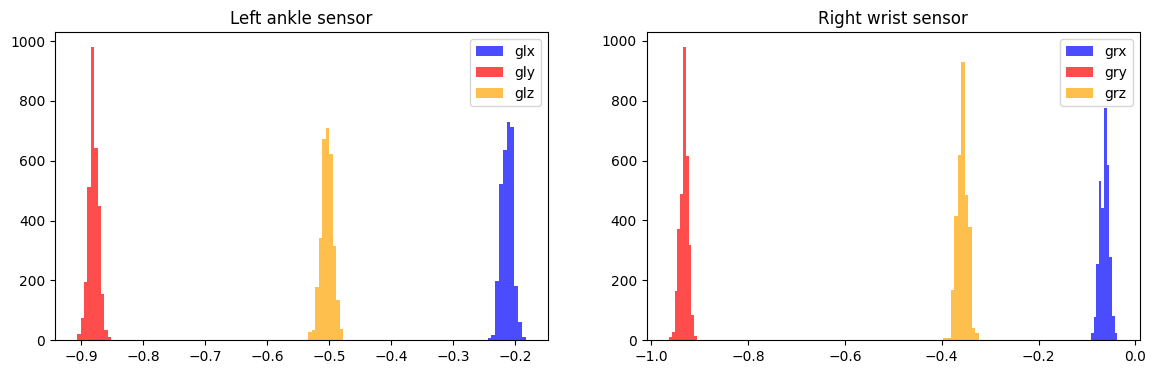

=====================Sitting and relaxing (1 min) - a==========


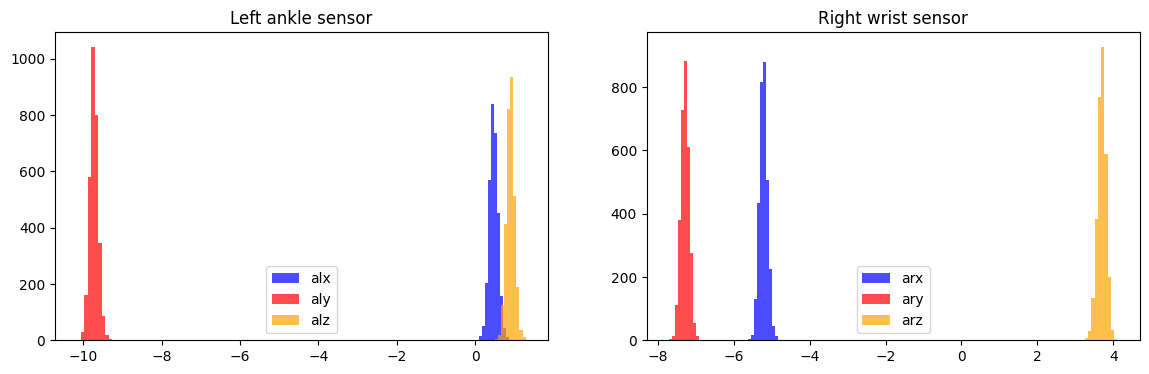

=====================Sitting and relaxing (1 min) - g==========


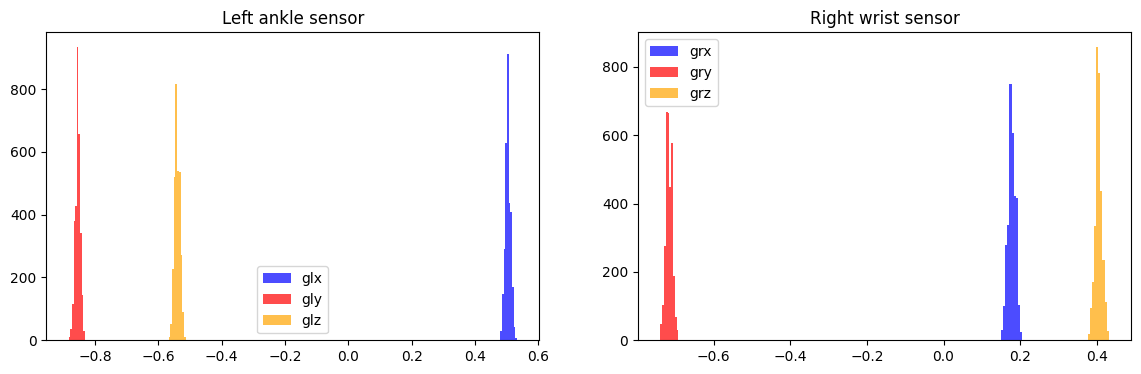

=====================Lying down (1 min) - a==========


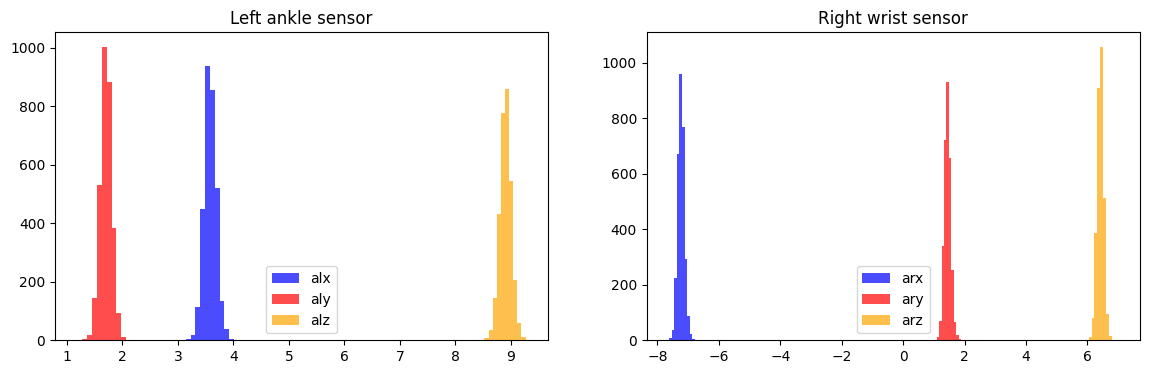

=====================Lying down (1 min) - g==========


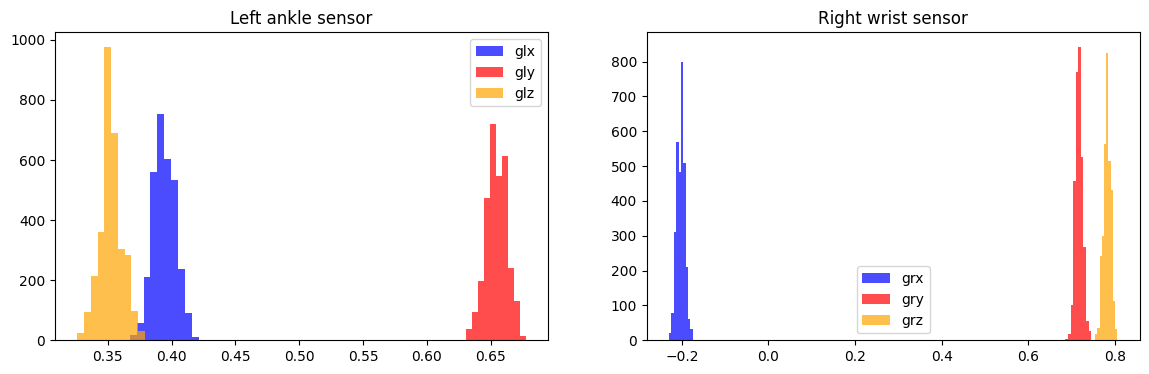

=====================Walking (1 min) - a==========


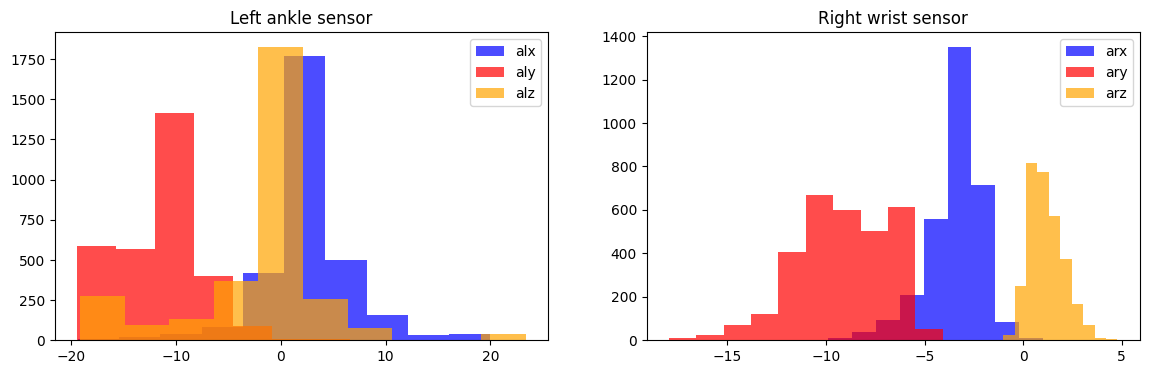

=====================Walking (1 min) - g==========


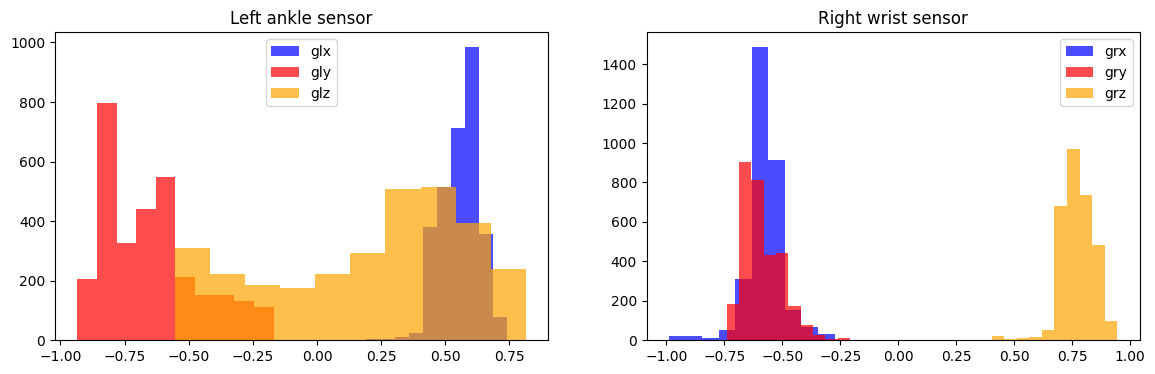

=====================Climbing stairs (1 min) - a==========


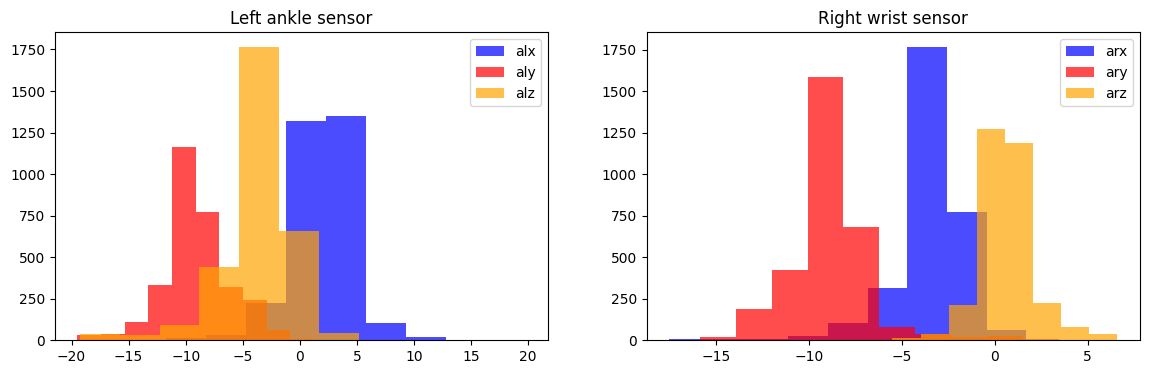

=====================Climbing stairs (1 min) - g==========


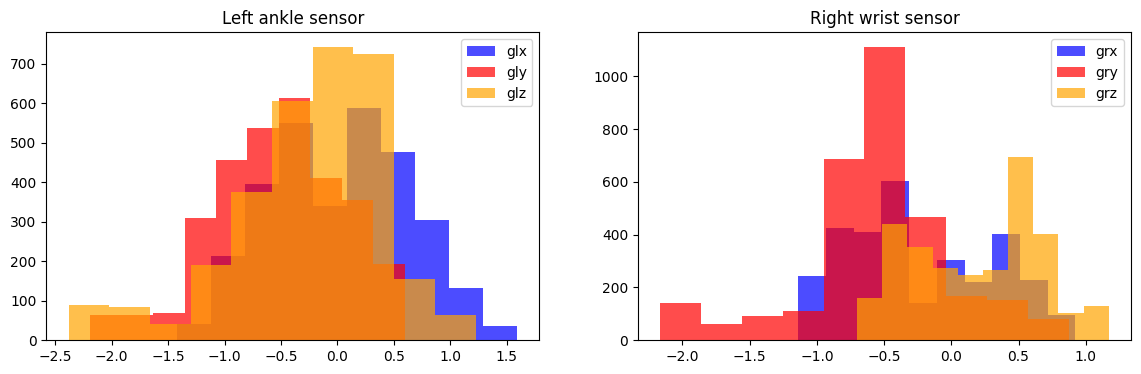

=====================Waist bends forward (20x) - a==========


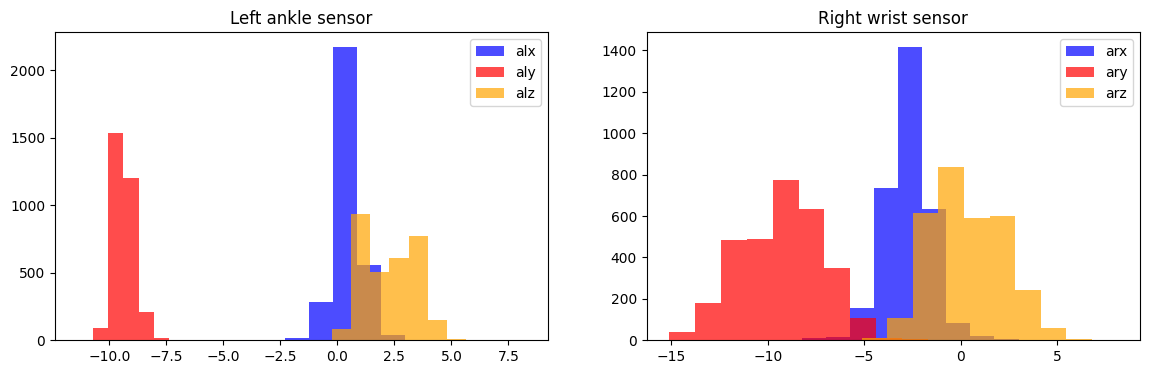

=====================Waist bends forward (20x) - g==========


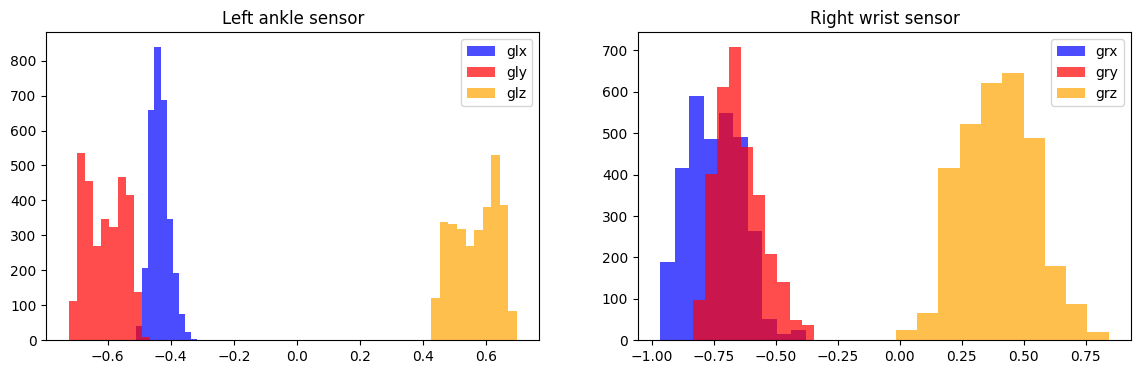

=====================Frontal elevation of arms (20x) - a==========


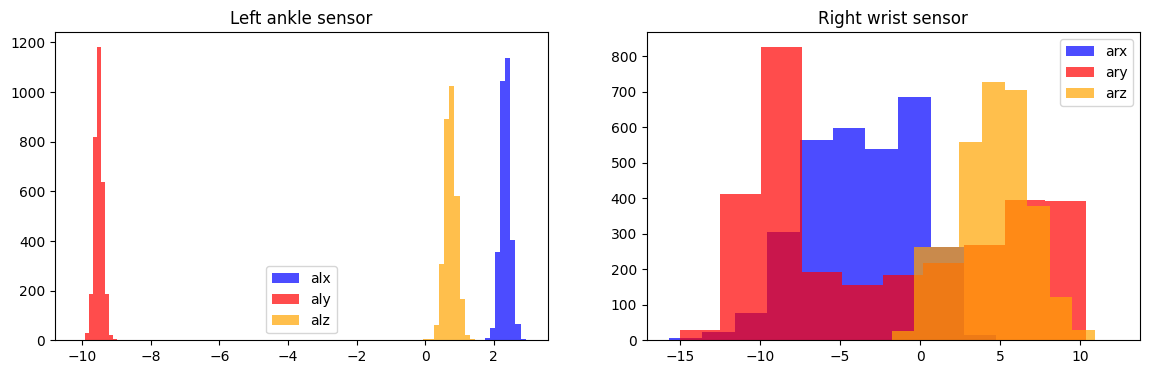

=====================Frontal elevation of arms (20x) - g==========


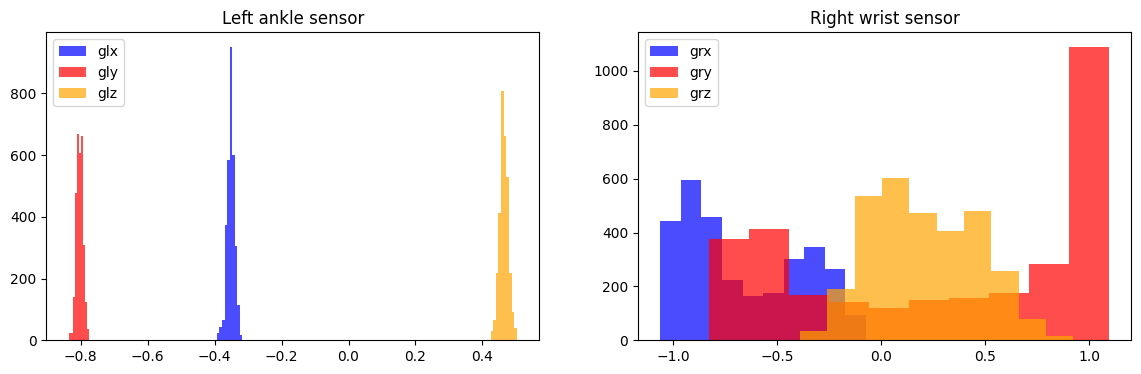

=====================Knees bending (crouching) (20x) - a==========


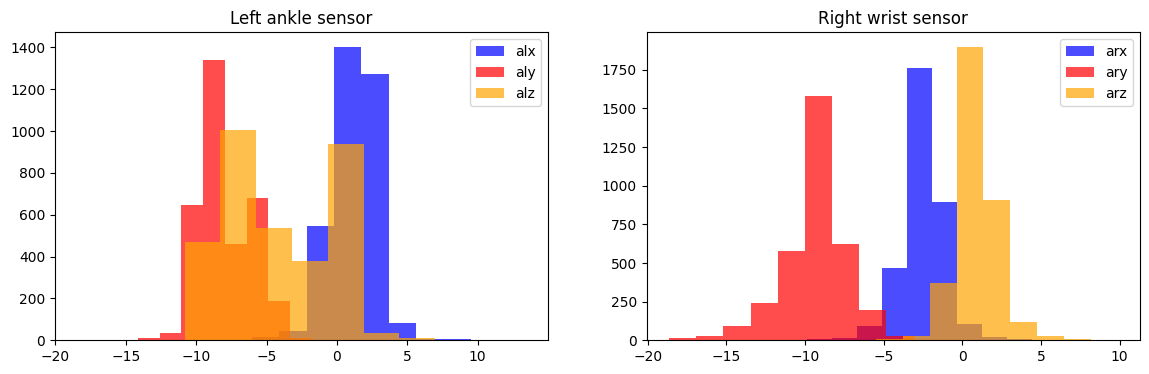

=====================Knees bending (crouching) (20x) - g==========


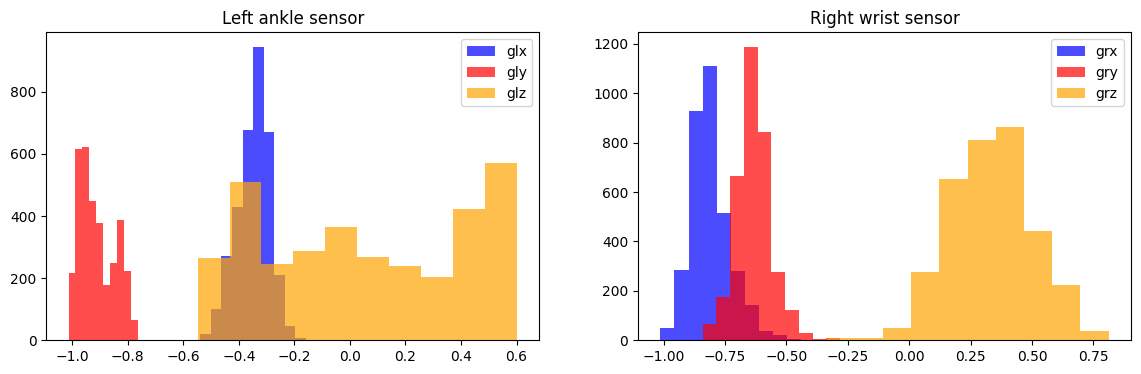

=====================Cycling (1 min) - a==========


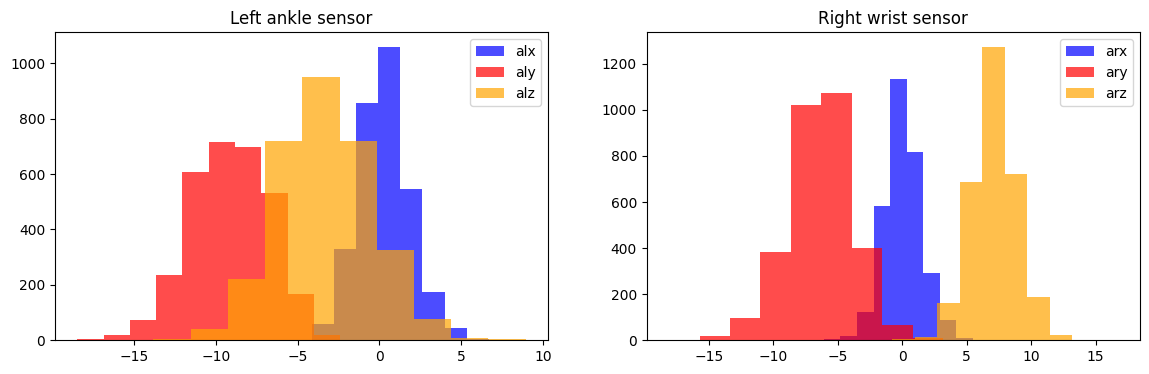

=====================Cycling (1 min) - g==========


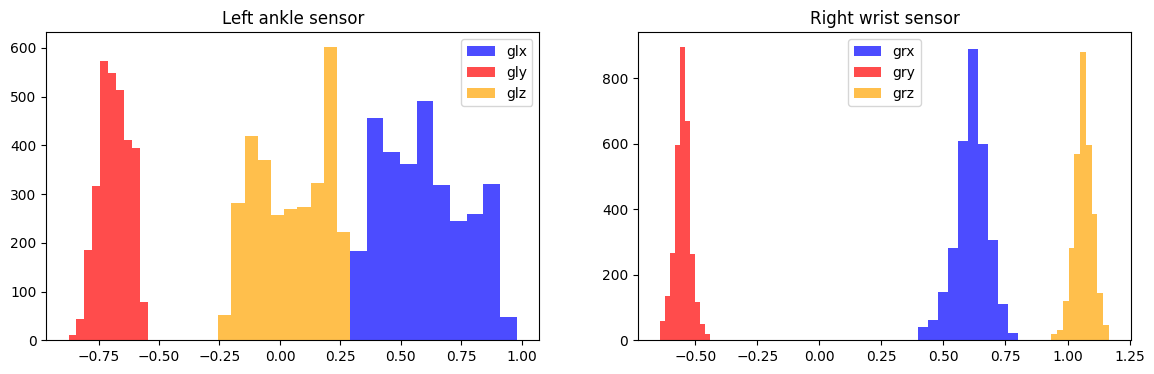

=====================Jogging (1 min) - a==========


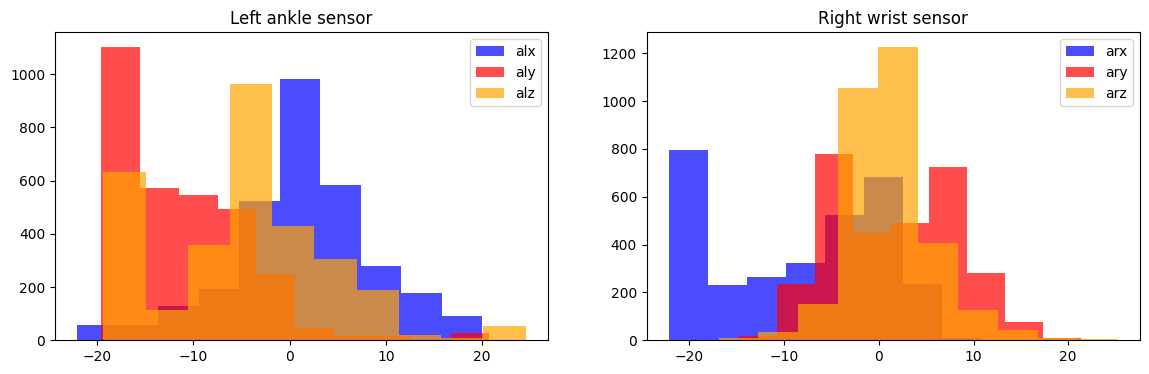

=====================Jogging (1 min) - g==========


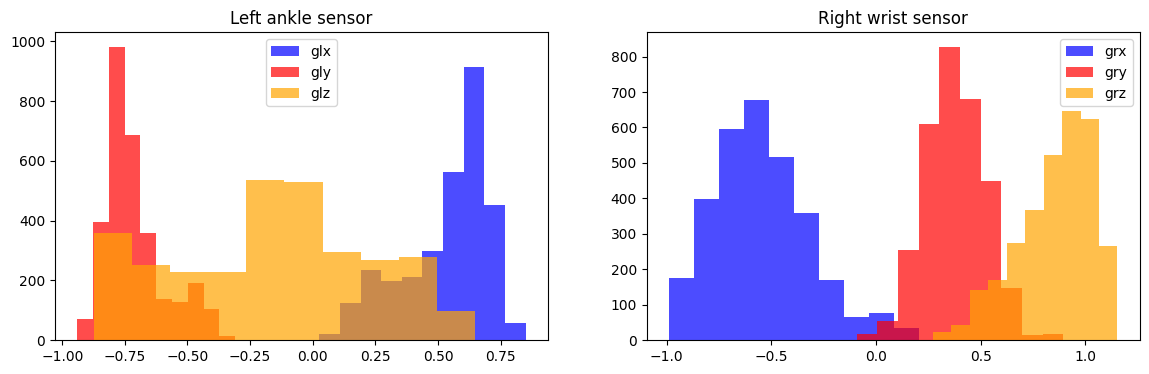

=====================Running (1 min) - a==========


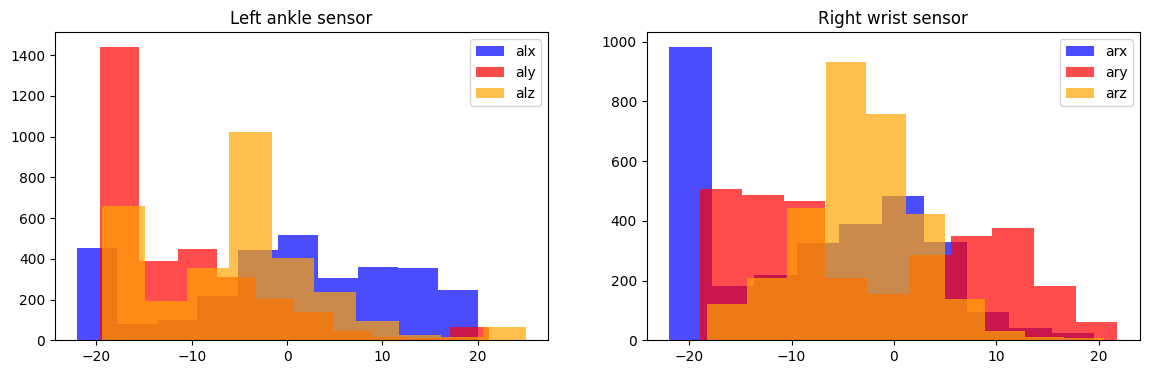

=====================Running (1 min) - g==========


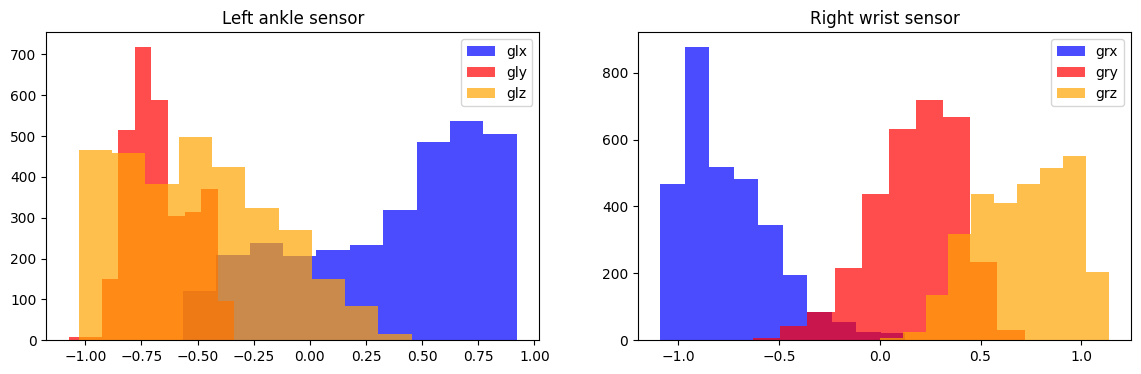

=====================Jump front & back (20x) - a==========


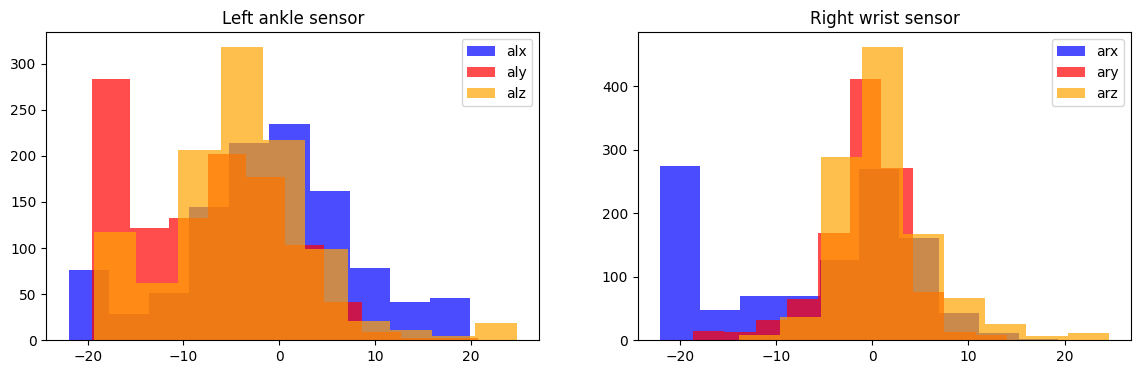

=====================Jump front & back (20x) - g==========


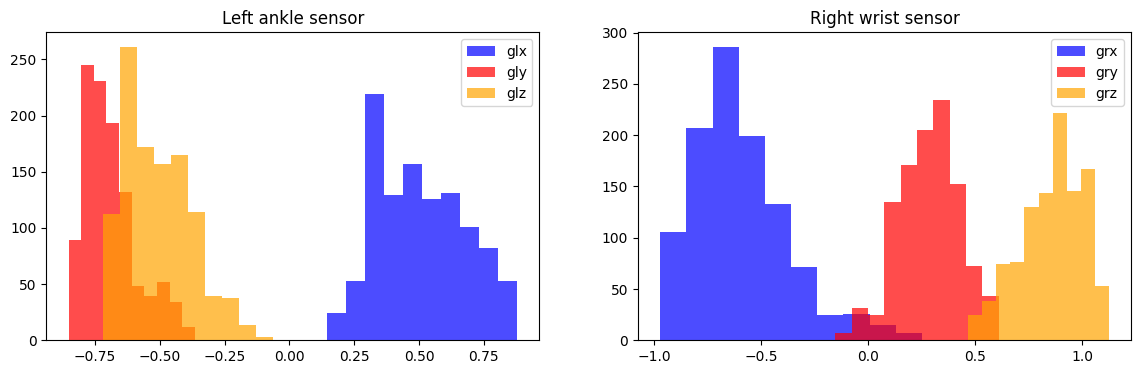

In [178]:
# Histogram : Plotting
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"====================={activity_label[i]} - {r}==========")
        plt.figure(figsize = (14,4))
        # Left ankle
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"], color='blue', alpha=0.7, label=r + "lx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"], color='red', alpha=0.7, label=r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"], color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        # Right ankle
        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ry"], color='red', alpha=0.7, label = r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rz"], color = 'orange', alpha= 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

In [179]:
df['Activity'] = df['Activity'].replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ["None",
     'Standing still (1 min)',
     'Sitting and relaxing (1 min)',
     'Lying down (1 min)',
     'Walking (1 min)',
     'Climbing stairs (1 min)',
     'Waist bends forward (20x)',
     'Frontal elevation of arms (20x)',
     'Knees bending (crouching) (20x)',
     'Cycling (1 min)',
     'Jogging (1 min)',
     'Running (1 min)',
     'Jump front & back (20x)']
)


In [180]:
df["Activity"].value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

In [181]:
df.head()

alx      aly       alz      glx       gly       glz       arx  \
915765   2.3107  -9.5836  0.054343  0.73098 -0.607880  0.123770  -6.81050   
181203 -15.1570 -13.5100  2.443800 -0.49907 -0.782360  0.043222 -10.07200   
423766   2.2434  -3.7535 -9.009000 -0.91280 -0.187620 -1.563900  -5.33670   
87246    2.2883  -9.5053  0.953870  0.51763 -0.613510  0.504910  -4.40510   
281644  -0.1538  -5.5719 -7.686400 -0.38404  0.003752 -0.823180  -0.78432   

            ary      arz      grx      gry      grz Activity   subject  
915765 -5.52810  1.19230 -0.56667 -0.44969  0.88147     None  subject8  
181203 -0.83323  3.67710 -0.95294 -0.18480 -0.30388     None  subject2  
423766 -1.48620  8.38400 -1.41570  0.20945  1.85560     None  subject4  
87246  -8.82220  0.77764 -0.55490 -0.60575  0.78664     None  subject1  
281644 -1.22780  7.21990 -0.47451 -1.06780  0.46983     None  subject2

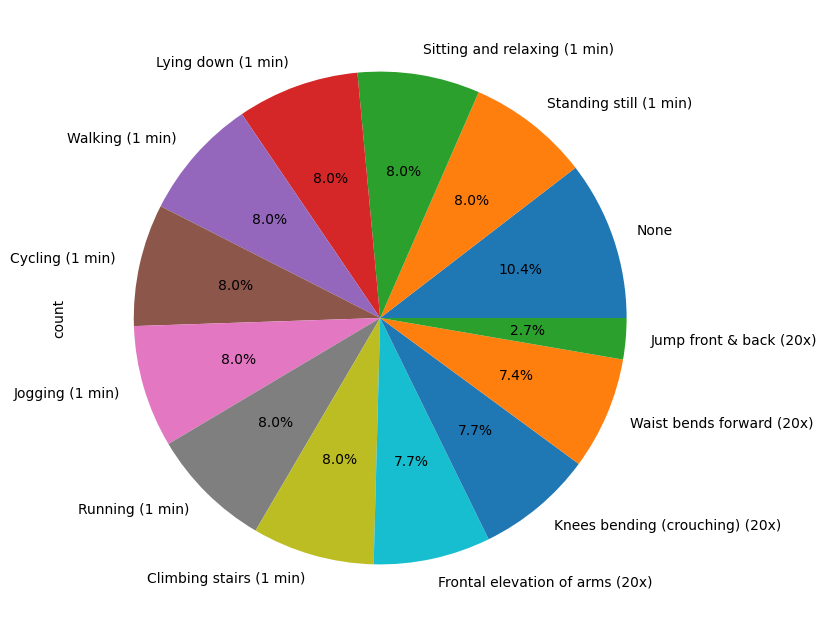

In [182]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.show()

In [183]:
df1= df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile (df[feature], 0.99)
    
    print(feature, "range:", lower_range, 'to', upper_range)
    
    df1 = df1.drop(df1[(df1 [feature] >upper_range) | (df1 [feature] < lower_range)].index, axis = 0)
    print('shape', df1.shape)

alx range: -11.402 to 19.229059999999997
shape (375532, 14)
aly range: -19.378 to 2.372817999999999
shape (369616, 14)
alz range: -18.949 to 14.128059999999998
shape (365806, 14)
glx range: -0.75139 to 0.80891
shape (358766, 14)
gly range: -1.0675 to 0.96623
shape (352098, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346411, 14)
arx range: -21.487 to 9.030701999999996
shape (341184, 14)
ary range: -18.691 to 11.832
shape (334986, 14)
arz range: -10.25912 to 11.783059999999997
shape (332315, 14)
grx range: -1.0216 to 0.95294
shape (328689, 14)
gry range: -1.1437 to 0.9117
shape (323655, 14)
grz range: -0.7069 to 1.125
shape (318995, 14)


In [184]:

df1

alx       aly       alz      glx       gly       glz       arx  \
915765   2.31070  -9.58360  0.054343  0.73098 -0.607880  0.123770  -6.81050   
87246    2.28830  -9.50530  0.953870  0.51763 -0.613510  0.504910  -4.40510   
281644  -0.15380  -5.57190 -7.686400 -0.38404  0.003752 -0.823180  -0.78432   
477583  -1.41890  -9.25810  1.908300 -0.66419 -0.726080 -0.349710   0.59754   
602867  -0.17040  -1.25790 -4.012500  0.64564 -0.742960 -0.074656   0.47490   
...          ...       ...       ...      ...       ...       ...       ...   
1213636 -0.19979  -0.93484  2.555400  0.63080 -0.525330 -0.679760  -4.02120   
1213637 -0.33315  -1.23710 -2.919400  0.63822 -0.427770 -0.748530  -2.25150   
1213640  6.77570 -15.07500  7.397400  0.61967 -0.337710 -0.827110  -2.27970   
1213641 -2.48730 -19.23300  3.461400  0.61967 -0.337710 -0.827110  -8.23480   
1213645 -2.36980 -19.30000 -4.238700  0.71058 -0.270170 -0.754420 -21.17300   

               ary      arz      grx       gry       grz  \
915765   -5.528100  1.19230 -0.56667 -0.449690  0.881470   
87246    -8.822200  0.77764 -0.55490 -0.605750  0.786640   
281644   -1.227800  7.21990 -0.47451 -1.067800  0.469830   
477583   -8.454300  2.56690 -0.24510 -1.000000 -0.359910   
602867    1.367100  1.71420 -0.54510 -0.032854  1.025900   
...            ...      ...      ...       ...       ...   
1213636  -0.082645  0.73545 -0.45882 -1.000000  0.122840   
1213637  -0.414790  0.52093 -0.41765 -1.037000  0.088362   
1213640  -2.358900  2.11120 -0.41765 -1.037000  0.088362   
1213641  -4.965200  2.48090 -0.43725 -1.018500  0.079741   
1213645 -14.291000 -0.13123 -0.42549 -1.037000  0.084052   

                        Activity    subject  
915765                      None   subject8  
87246                       None   subject1  
281644                      None   subject2  
477583                      None   subject4  
602867                      None   subject5  
...                          ...        ...  
1213636  Jump front & back (20x)  subject10  
1213637  Jump front & back (20x)  subject10  
1213640  Jump front & back (20x)  subject10  
1213641  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[318995 rows x 14 columns]

## 4 : Data Preprocessing 

In [185]:
le = LabelEncoder()
df["subject"] = le.fit_transform(df["subject"])


In [186]:
df

alx      aly       alz      glx       gly       glz       arx  \
915765    2.3107  -9.5836  0.054343  0.73098 -0.607880  0.123770  -6.81050   
181203  -15.1570 -13.5100  2.443800 -0.49907 -0.782360  0.043222 -10.07200   
423766    2.2434  -3.7535 -9.009000 -0.91280 -0.187620 -1.563900  -5.33670   
87246     2.2883  -9.5053  0.953870  0.51763 -0.613510  0.504910  -4.40510   
281644   -0.1538  -5.5719 -7.686400 -0.38404  0.003752 -0.823180  -0.78432   
...          ...      ...       ...      ...       ...       ...       ...   
1213641  -2.4873 -19.2330  3.461400  0.61967 -0.337710 -0.827110  -8.23480   
1213642 -21.5910 -19.4370 -6.041900  0.61967 -0.337710 -0.827110 -21.31800   
1213643   7.5433 -19.2450 -2.668000  0.61967 -0.337710 -0.827110 -21.29700   
1213644   3.0142 -19.3340 -7.707400  0.71058 -0.270170 -0.754420 -21.13800   
1213645  -2.3698 -19.3000 -4.238700  0.71058 -0.270170 -0.754420 -21.17300   

              ary      arz      grx      gry       grz  \
915765   -5.52810  1.19230 -0.56667 -0.44969  0.881470   
181203   -0.83323  3.67710 -0.95294 -0.18480 -0.303880   
423766   -1.48620  8.38400 -1.41570  0.20945  1.855600   
87246    -8.82220  0.77764 -0.55490 -0.60575  0.786640   
281644   -1.22780  7.21990 -0.47451 -1.06780  0.469830   
...           ...      ...      ...      ...       ...   
1213641  -4.96520  2.48090 -0.43725 -1.01850  0.079741   
1213642 -10.21300  3.65600 -0.43725 -1.01850  0.079741   
1213643 -18.70500  4.46060 -0.43725 -1.01850  0.079741   
1213644 -18.69800  1.15880 -0.42549 -1.03700  0.084052   
1213645 -14.29100 -0.13123 -0.42549 -1.03700  0.084052   

                        Activity  subject  
915765                      None        8  
181203                      None        2  
423766                      None        4  
87246                       None        0  
281644                      None        2  
...                          ...      ...  
1213641  Jump front & back (20x)        1  
1213642  Jump front & back (20x)        1  
1213643  Jump front & back (20x)        1  
1213644  Jump front & back (20x)        1  
1213645  Jump front & back (20x)        1  

[383195 rows x 14 columns]

In [187]:
df["Activity"] = le.fit_transform(df["Activity"])

<Figure size 1000x800 with 0 Axes>

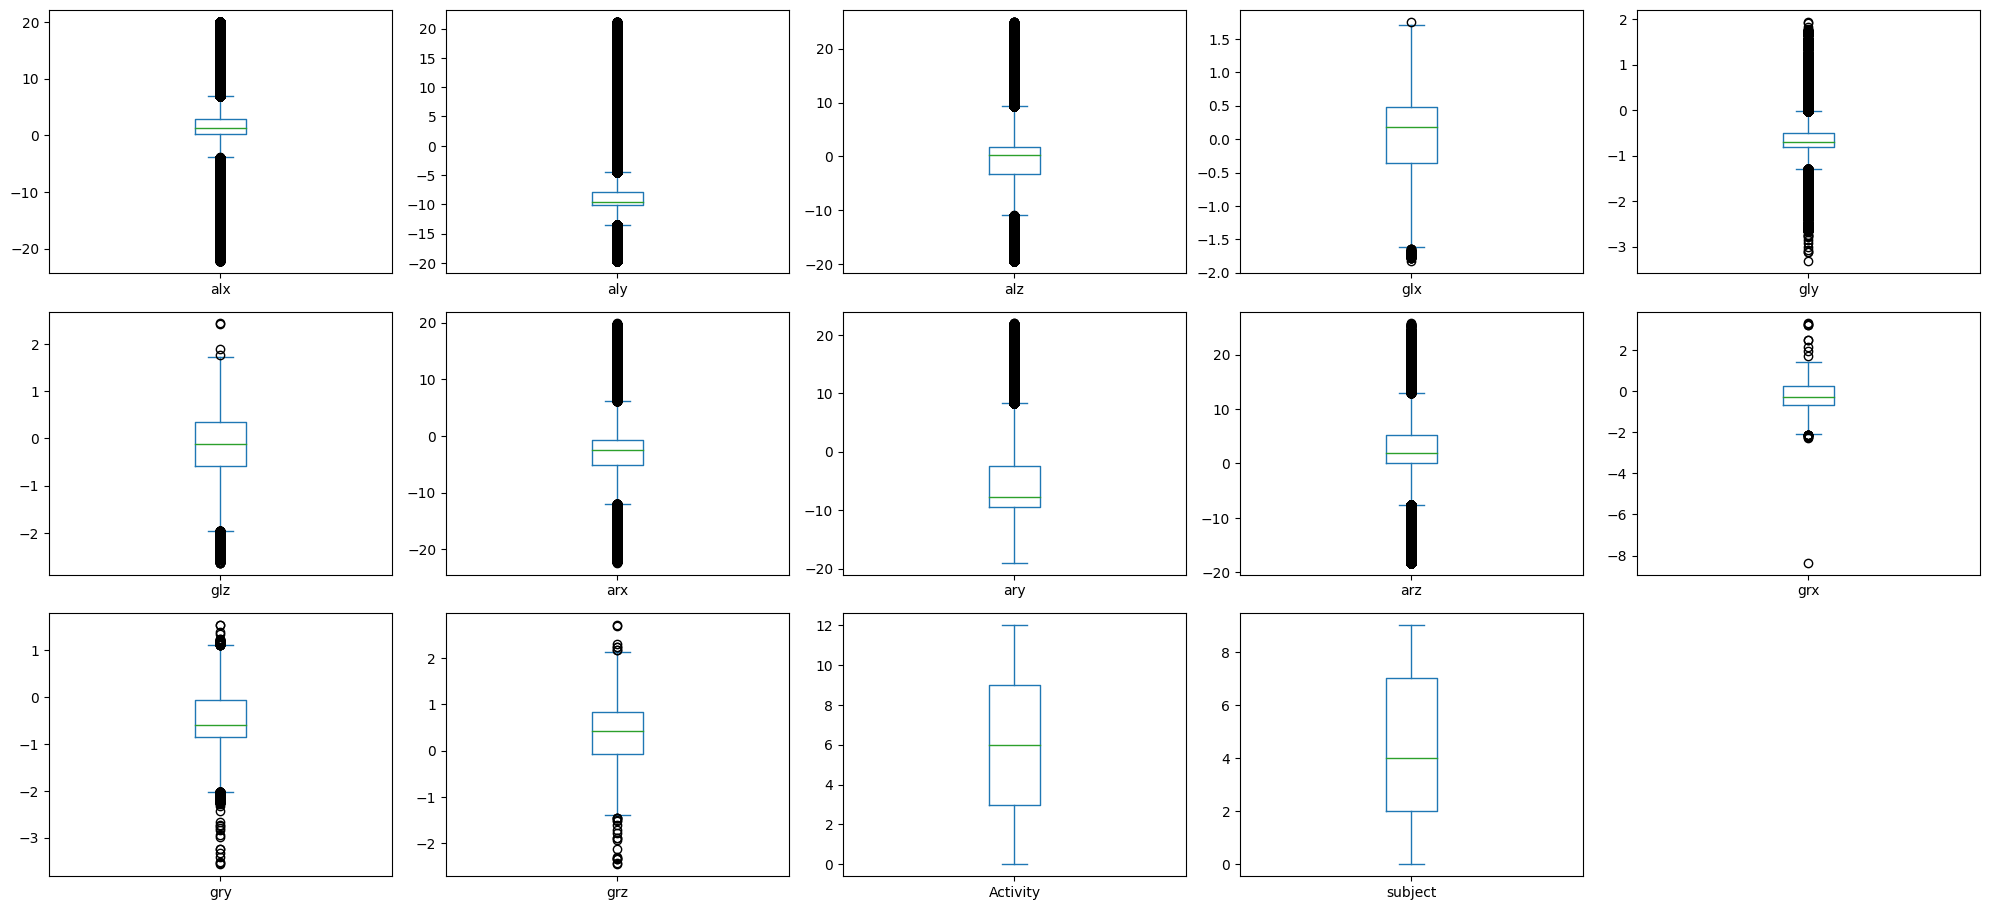

In [188]:
plt.figure(figsize = (10 , 8 ))
df.plot(kind='box', subplots=True, layout = (5,5), figsize=(20,15))
plt.tight_layout()
plt.show()

In [189]:
# X and y
X = df.drop(columns = ["Activity" , "subject"])
y = df["Activity"]


In [190]:
# Train , Test : Split 

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42)


In [191]:
# Robust Scaler
ro = RobustScaler()
X_train_scaled = ro.fit_transform(X_train)
X_test_scaled = ro.fit_transform(X_test)

## 5 : Model Building 

In [192]:
def resultsSummarizer(y_true, y_pred):
    # Compute metrics
    cm = confusion_matrix(y_true, y_pred)  # Confusion matrix
    acc = accuracy_score(y_true, y_pred)   # Accuracy
    prec = precision_score(y_true, y_pred, average='macro')  # Macro precision
    rec = recall_score(y_true, y_pred, average='macro')      # Macro recall (sensitivity)
    f1 = f1_score(y_true, y_pred, average='macro')           # Macro F1-score

    # Plot confusion matrix
    plt.figure(figsize=(15, 15))
    sns.heatmap(
        cm,
        annot=True,         # Show numbers
        cmap="Blues", 
        fmt="d",
        cbar = False ,
        xticklabels=activity_label.values(),
        yticklabels=activity_label.values()
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    
    # Full classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=activity_label.values()))

### 1) Logistic Regression 


In [193]:
# Logistic Regression Model - 1.0
lr_model1 = LogisticRegression()

In [194]:
lr_model1.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

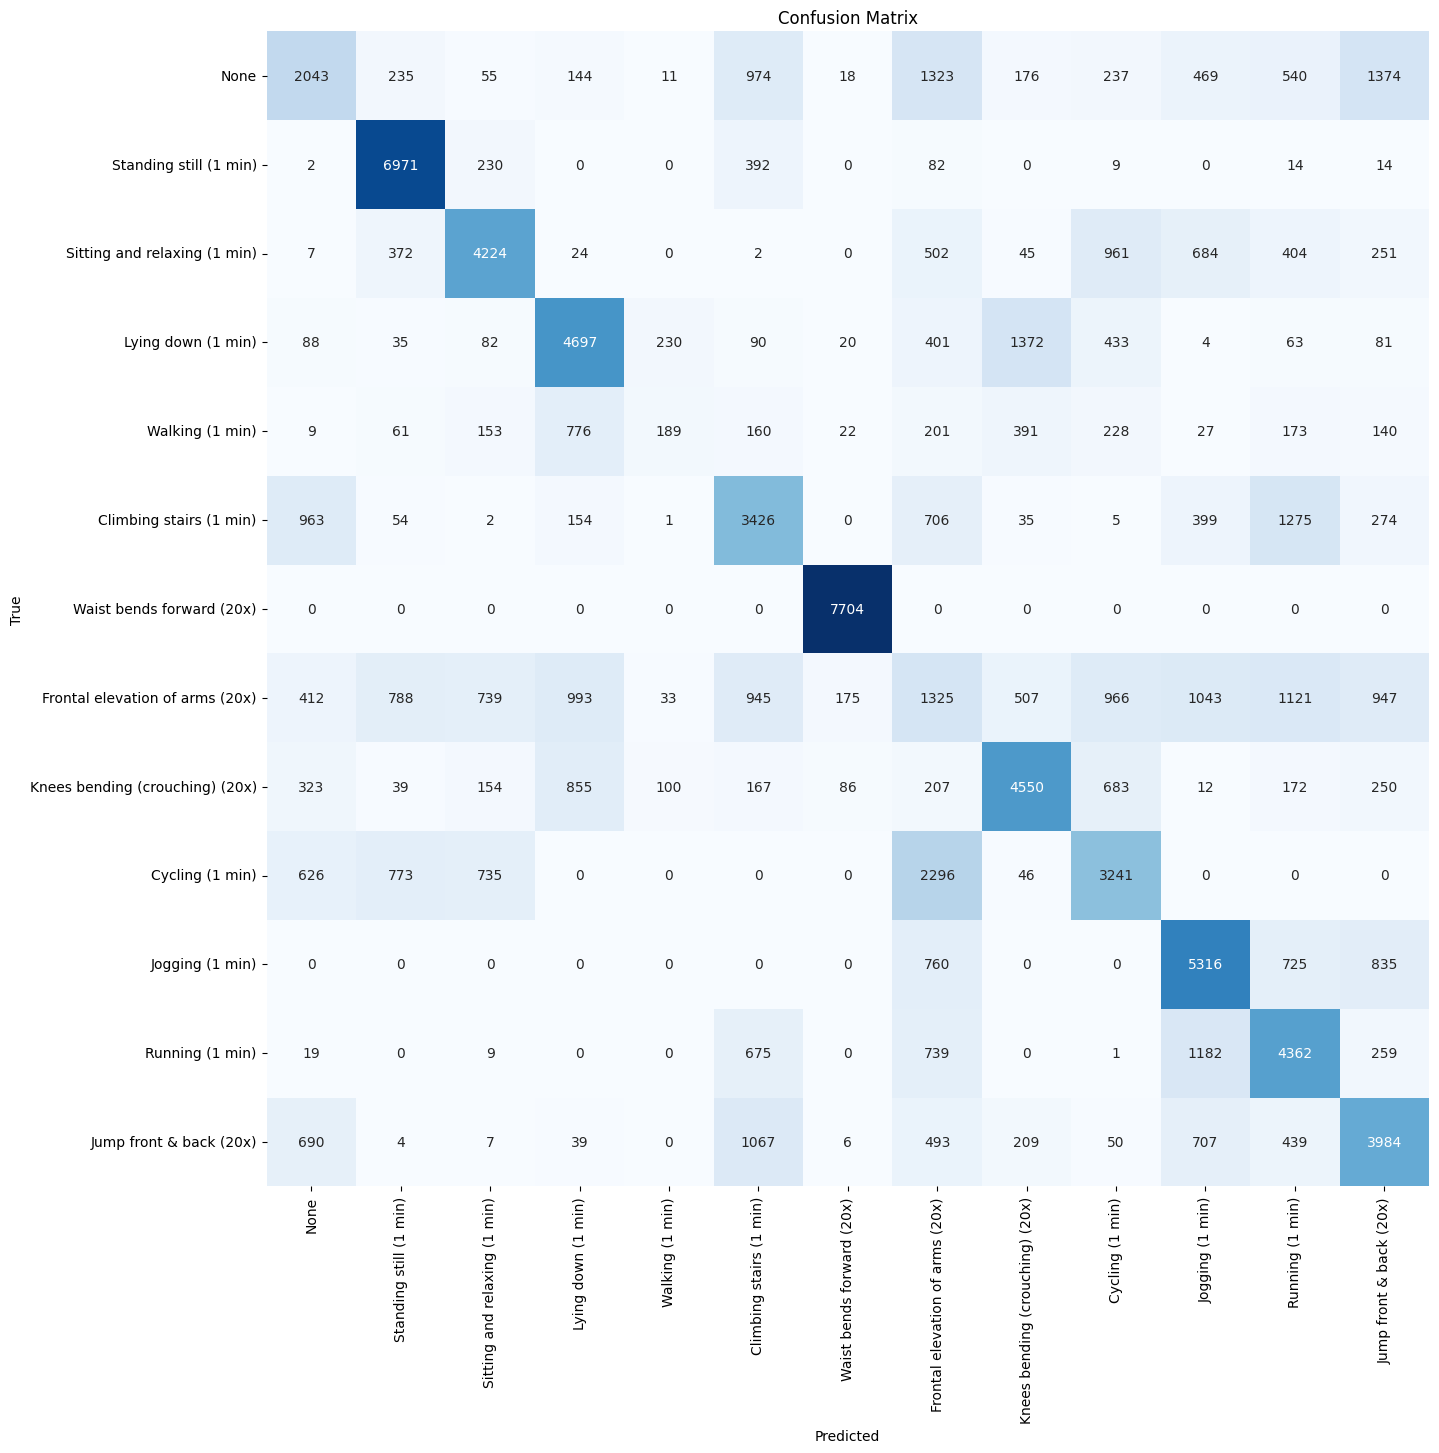

Accuracy: 0.5431
Precision (macro): 0.5283
Recall (macro): 0.5283
F1-score (macro): 0.5184

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.39      0.27      0.32      7599
         Standing still (1 min)       0.75      0.90      0.82      7714
   Sitting and relaxing (1 min)       0.66      0.57      0.61      7476
             Lying down (1 min)       0.61      0.62      0.61      7596
                Walking (1 min)       0.34      0.07      0.12      2530
        Climbing stairs (1 min)       0.43      0.47      0.45      7294
      Waist bends forward (20x)       0.96      1.00      0.98      7704
Frontal elevation of arms (20x)       0.15      0.13      0.14      9994
Knees bending (crouching) (20x)       0.62      0.60      0.61      7598
                Cycling (1 min)       0.48      0.42      0.45      7717
                Jogging (1 min)       0.54      0.70      0.61      7636
        

In [195]:
y_pred = lr_model1.predict(X_test)
resultsSummarizer( y_test , y_pred)

In [196]:
# Logistic Regression 1.1
lr_model2 = LogisticRegression()

In [197]:
lr_model2.fit(X_train_scaled , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

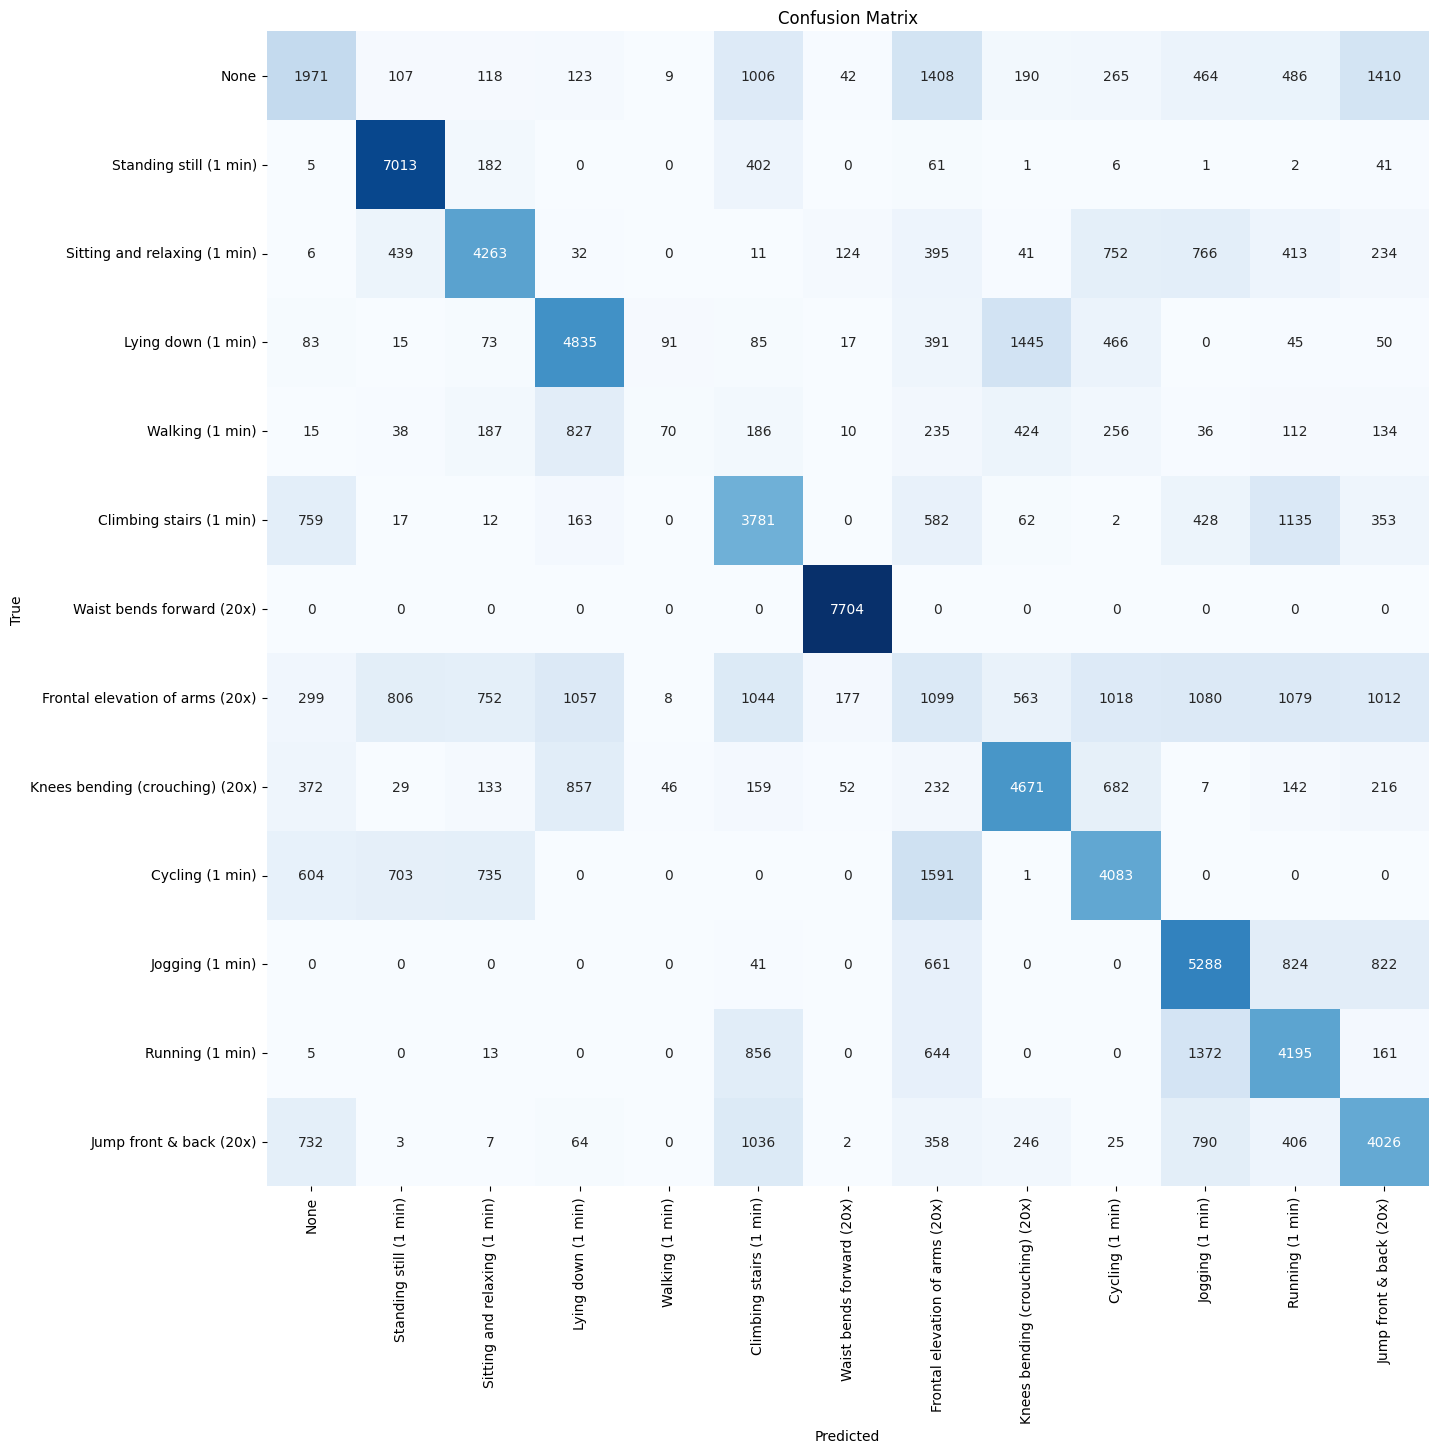

Accuracy: 0.5532
Precision (macro): 0.5307
Recall (macro): 0.5361
F1-score (macro): 0.5203

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.41      0.26      0.32      7599
         Standing still (1 min)       0.76      0.91      0.83      7714
   Sitting and relaxing (1 min)       0.66      0.57      0.61      7476
             Lying down (1 min)       0.61      0.64      0.62      7596
                Walking (1 min)       0.31      0.03      0.05      2530
        Climbing stairs (1 min)       0.44      0.52      0.48      7294
      Waist bends forward (20x)       0.95      1.00      0.97      7704
Frontal elevation of arms (20x)       0.14      0.11      0.12      9994
Knees bending (crouching) (20x)       0.61      0.61      0.61      7598
                Cycling (1 min)       0.54      0.53      0.53      7717
                Jogging (1 min)       0.52      0.69      0.59      7636
        

In [198]:
y_pred = lr_model2.predict(X_test_scaled)
resultsSummarizer( y_test , y_pred)

### 2) KNN

In [199]:
# KNeighborsClassifier - 1.0
knn_model1 = KNeighborsClassifier(n_neighbors = 3)
knn_model1.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

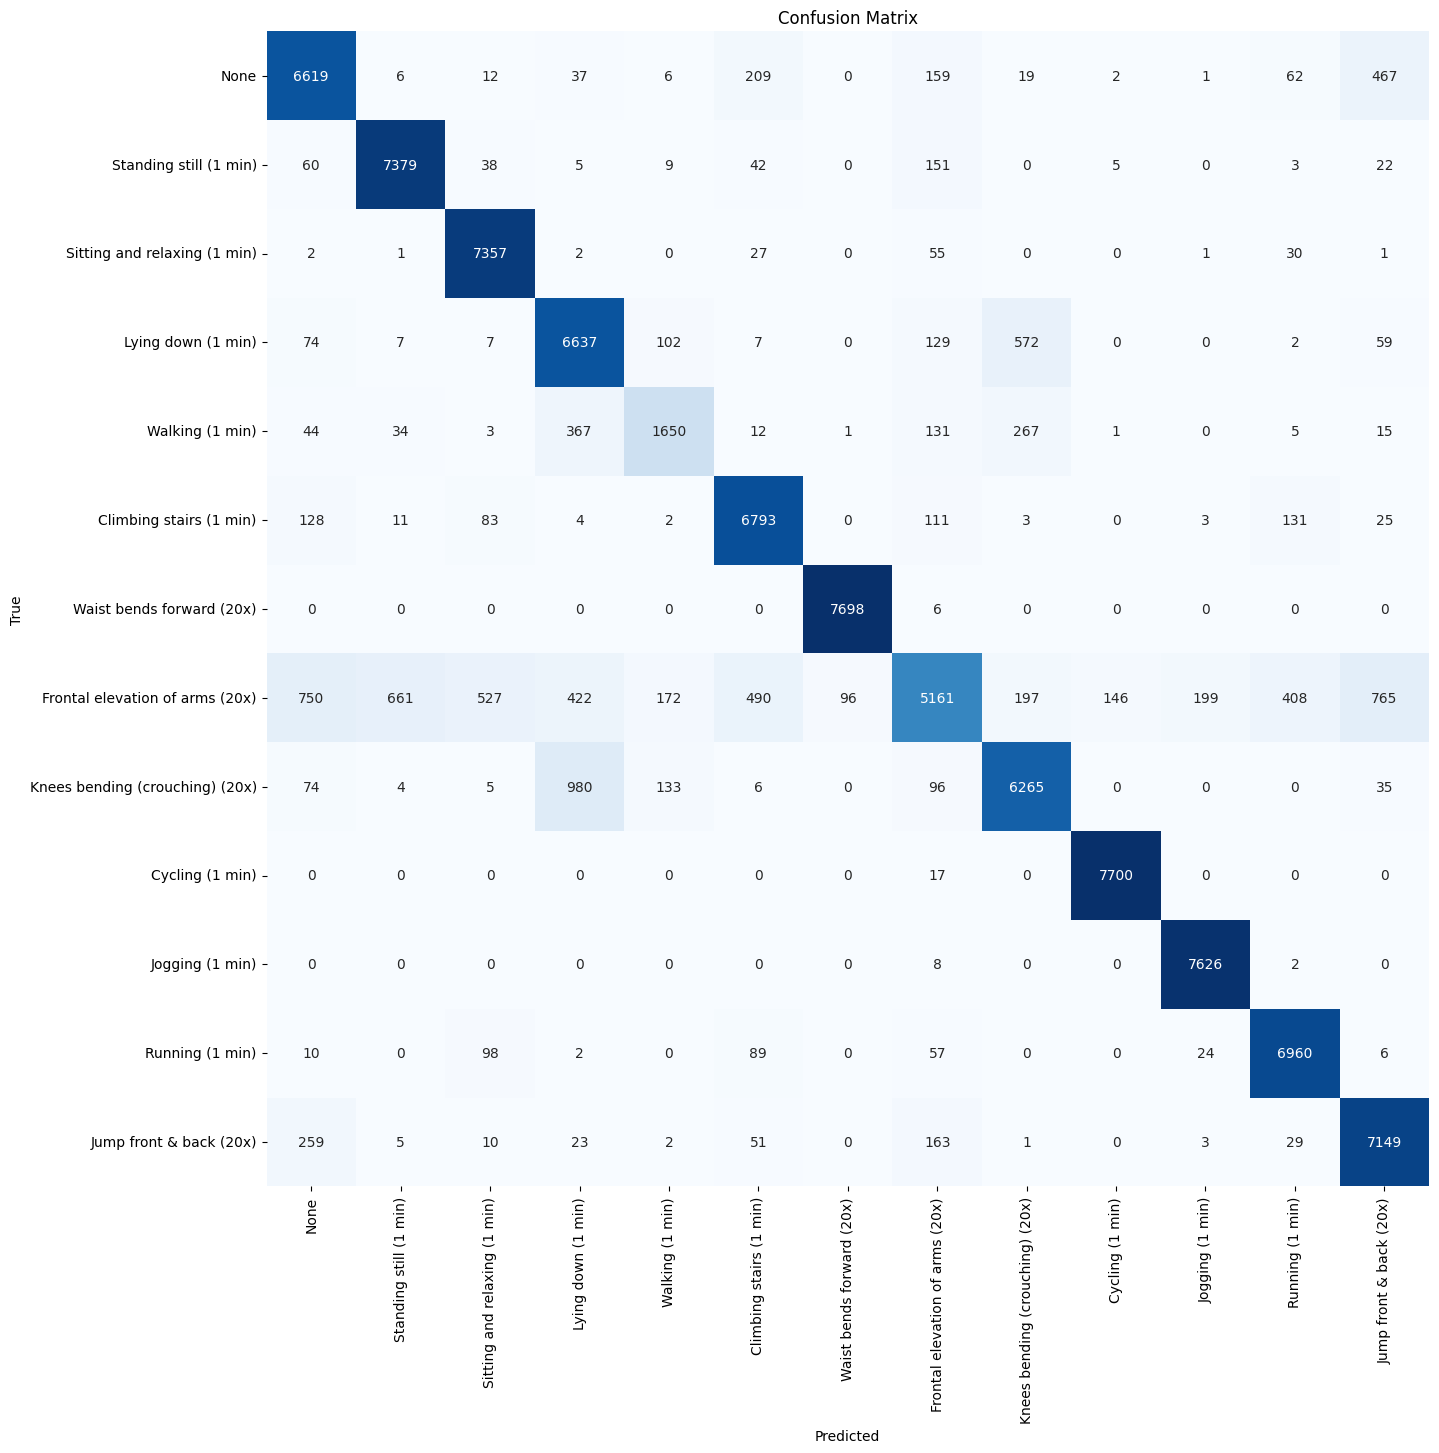

Accuracy: 0.8872
Precision (macro): 0.8819
Recall (macro): 0.8842
F1-score (macro): 0.8790

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.83      0.87      0.85      7599
         Standing still (1 min)       0.91      0.96      0.93      7714
   Sitting and relaxing (1 min)       0.90      0.98      0.94      7476
             Lying down (1 min)       0.78      0.87      0.83      7596
                Walking (1 min)       0.79      0.65      0.72      2530
        Climbing stairs (1 min)       0.88      0.93      0.90      7294
      Waist bends forward (20x)       0.99      1.00      0.99      7704
Frontal elevation of arms (20x)       0.83      0.52      0.64      9994
Knees bending (crouching) (20x)       0.86      0.82      0.84      7598
                Cycling (1 min)       0.98      1.00      0.99      7717
                Jogging (1 min)       0.97      1.00      0.98      7636
        

In [200]:
y_pred = knn_model1.predict(X_test)
resultsSummarizer(y_test , y_pred)

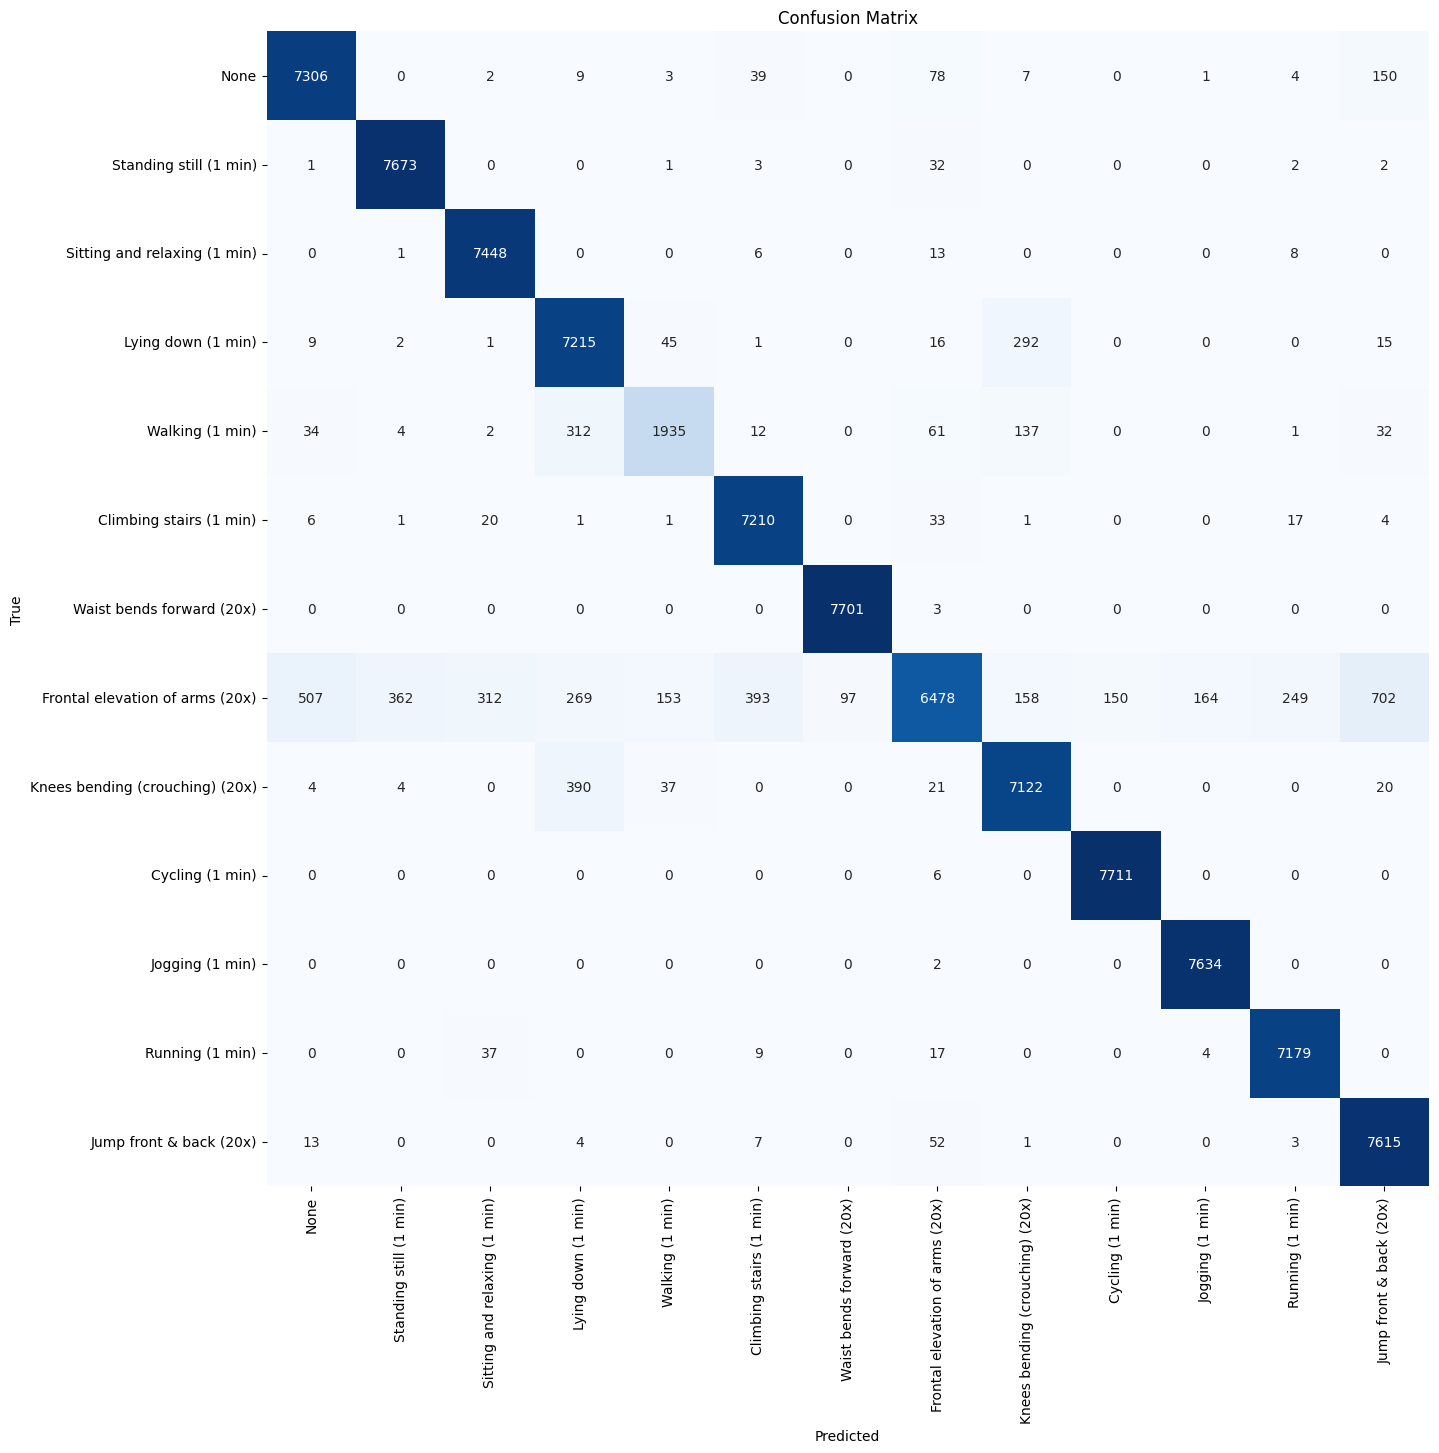

Accuracy: 0.9418
Precision (macro): 0.9396
Recall (macro): 0.9400
F1-score (macro): 0.9368

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.93      0.96      0.94      7599
         Standing still (1 min)       0.95      0.99      0.97      7714
   Sitting and relaxing (1 min)       0.95      1.00      0.97      7476
             Lying down (1 min)       0.88      0.95      0.91      7596
                Walking (1 min)       0.89      0.76      0.82      2530
        Climbing stairs (1 min)       0.94      0.99      0.96      7294
      Waist bends forward (20x)       0.99      1.00      0.99      7704
Frontal elevation of arms (20x)       0.95      0.65      0.77      9994
Knees bending (crouching) (20x)       0.92      0.94      0.93      7598
                Cycling (1 min)       0.98      1.00      0.99      7717
                Jogging (1 min)       0.98      1.00      0.99      7636
        

In [201]:
# KNeighborsClassifier - 1.0
knn_model2 = KNeighborsClassifier(n_neighbors = 3)
knn_model2.fit(X_train_scaled,  y_train)
y_pred = knn_model2.predict(X_test_scaled)
resultsSummarizer(y_test , y_pred)

### Naive Bayes 

In [202]:
# NB model : 1.0
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)

GaussianNB()

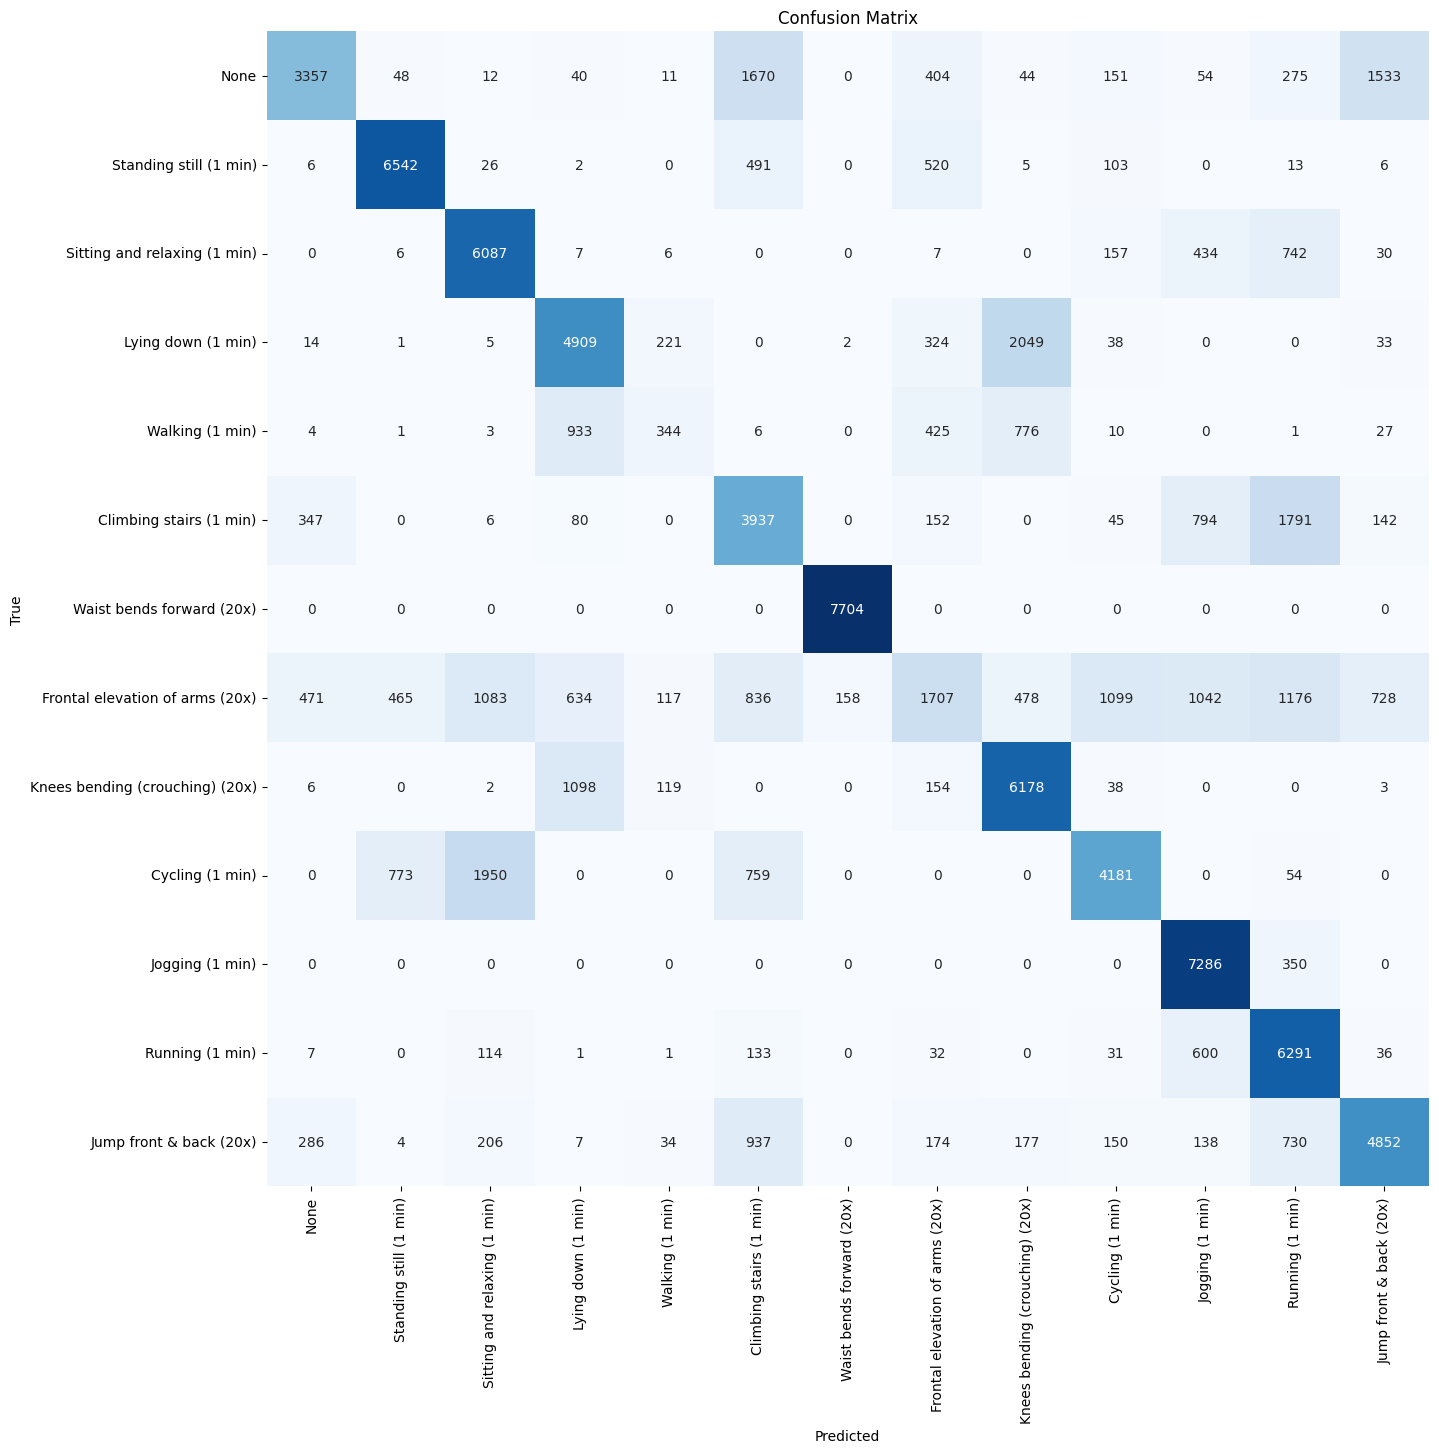

Accuracy: 0.6615
Precision (macro): 0.6440
Recall (macro): 0.6465
F1-score (macro): 0.6258

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.75      0.44      0.56      7599
         Standing still (1 min)       0.83      0.85      0.84      7714
   Sitting and relaxing (1 min)       0.64      0.81      0.72      7476
             Lying down (1 min)       0.64      0.65      0.64      7596
                Walking (1 min)       0.40      0.14      0.20      2530
        Climbing stairs (1 min)       0.45      0.54      0.49      7294
      Waist bends forward (20x)       0.98      1.00      0.99      7704
Frontal elevation of arms (20x)       0.44      0.17      0.25      9994
Knees bending (crouching) (20x)       0.64      0.81      0.71      7598
                Cycling (1 min)       0.70      0.54      0.61      7717
                Jogging (1 min)       0.70      0.95      0.81      7636
        

In [203]:
y_pred = nb_model.predict(X_test)
resultsSummarizer(y_test , y_pred)

In [204]:
# Naive Bayes Model : 1.1 

nb_model = GaussianNB()
nb_model.fit(X_train_scaled , y_train)

GaussianNB()

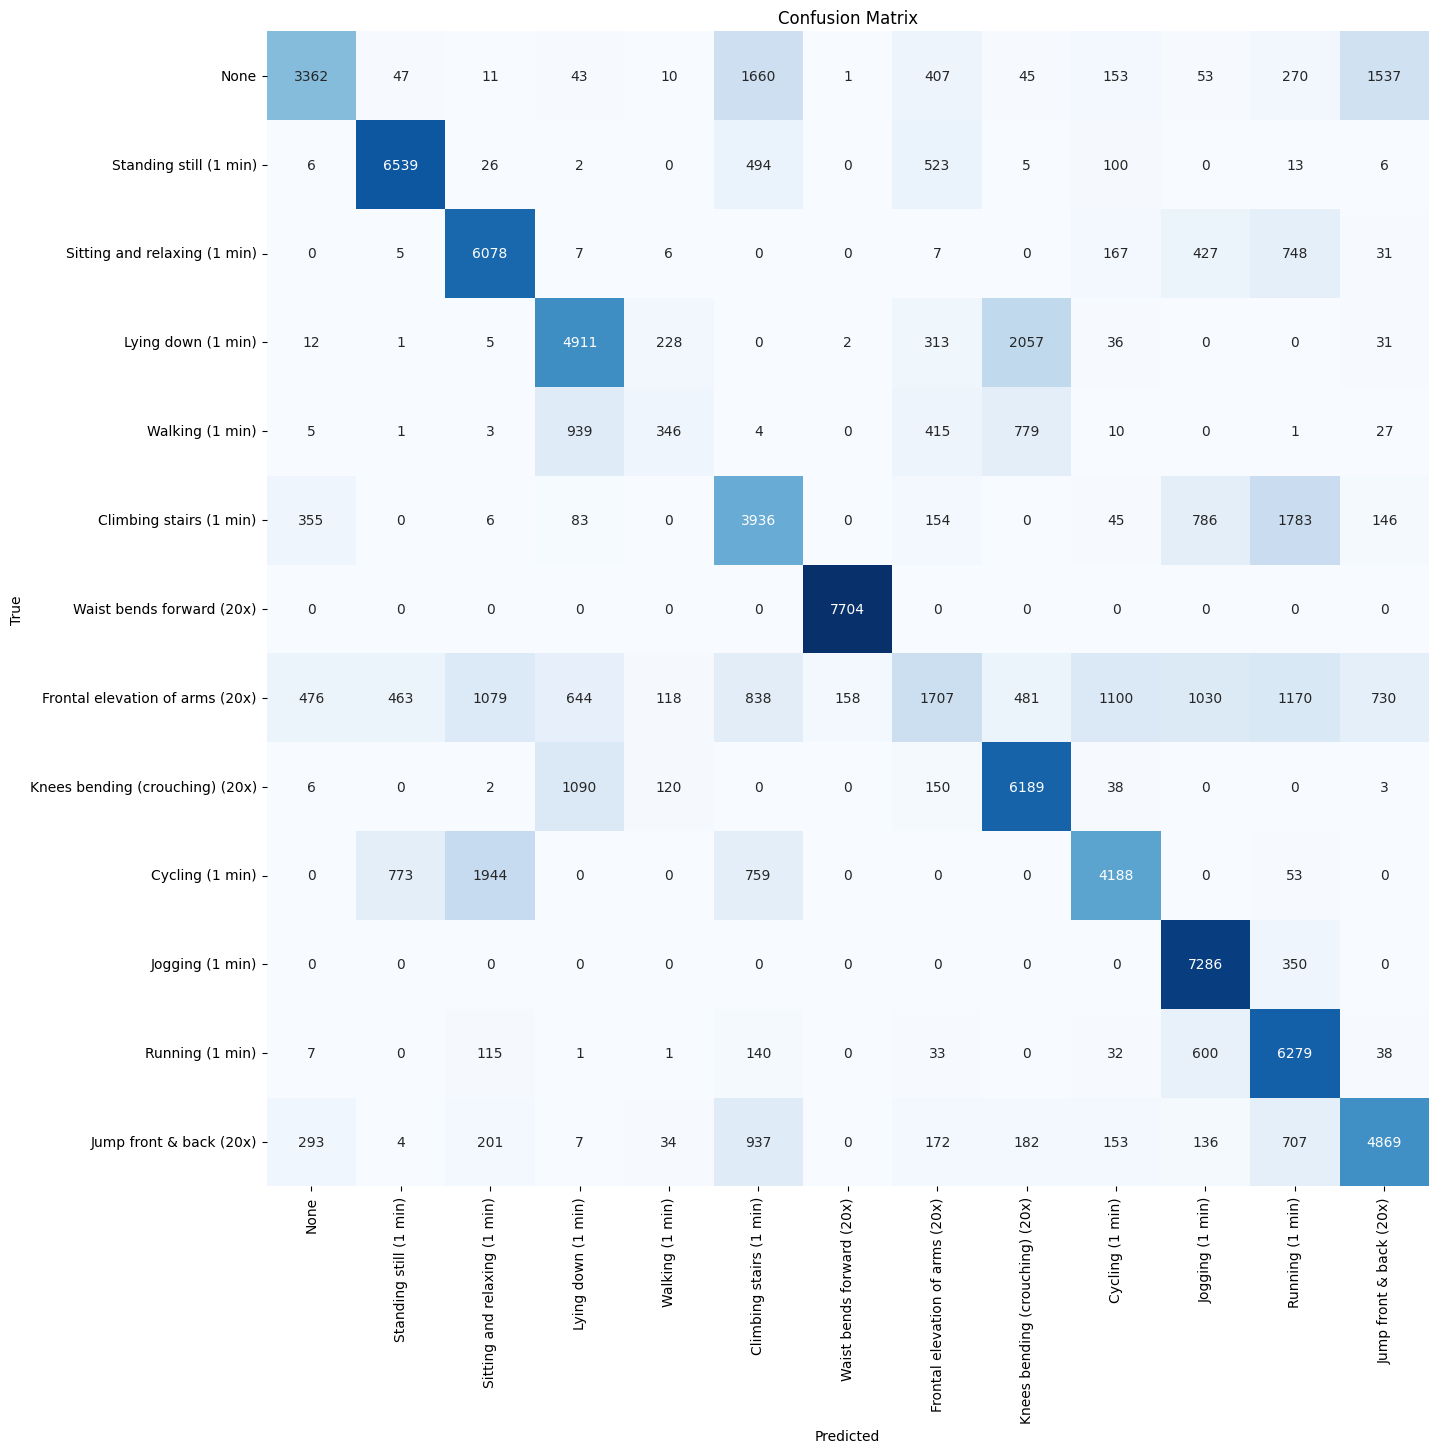

Accuracy: 0.6617
Precision (macro): 0.6439
Recall (macro): 0.6467
F1-score (macro): 0.6260

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.74      0.44      0.55      7599
         Standing still (1 min)       0.83      0.85      0.84      7714
   Sitting and relaxing (1 min)       0.64      0.81      0.72      7476
             Lying down (1 min)       0.64      0.65      0.64      7596
                Walking (1 min)       0.40      0.14      0.20      2530
        Climbing stairs (1 min)       0.45      0.54      0.49      7294
      Waist bends forward (20x)       0.98      1.00      0.99      7704
Frontal elevation of arms (20x)       0.44      0.17      0.25      9994
Knees bending (crouching) (20x)       0.64      0.81      0.71      7598
                Cycling (1 min)       0.70      0.54      0.61      7717
                Jogging (1 min)       0.71      0.95      0.81      7636
        

In [205]:
y_pred = nb_model.predict(X_test_scaled)
resultsSummarizer(y_test , y_pred)

### Decision Tree 

In [206]:
# DT model : 1.0 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

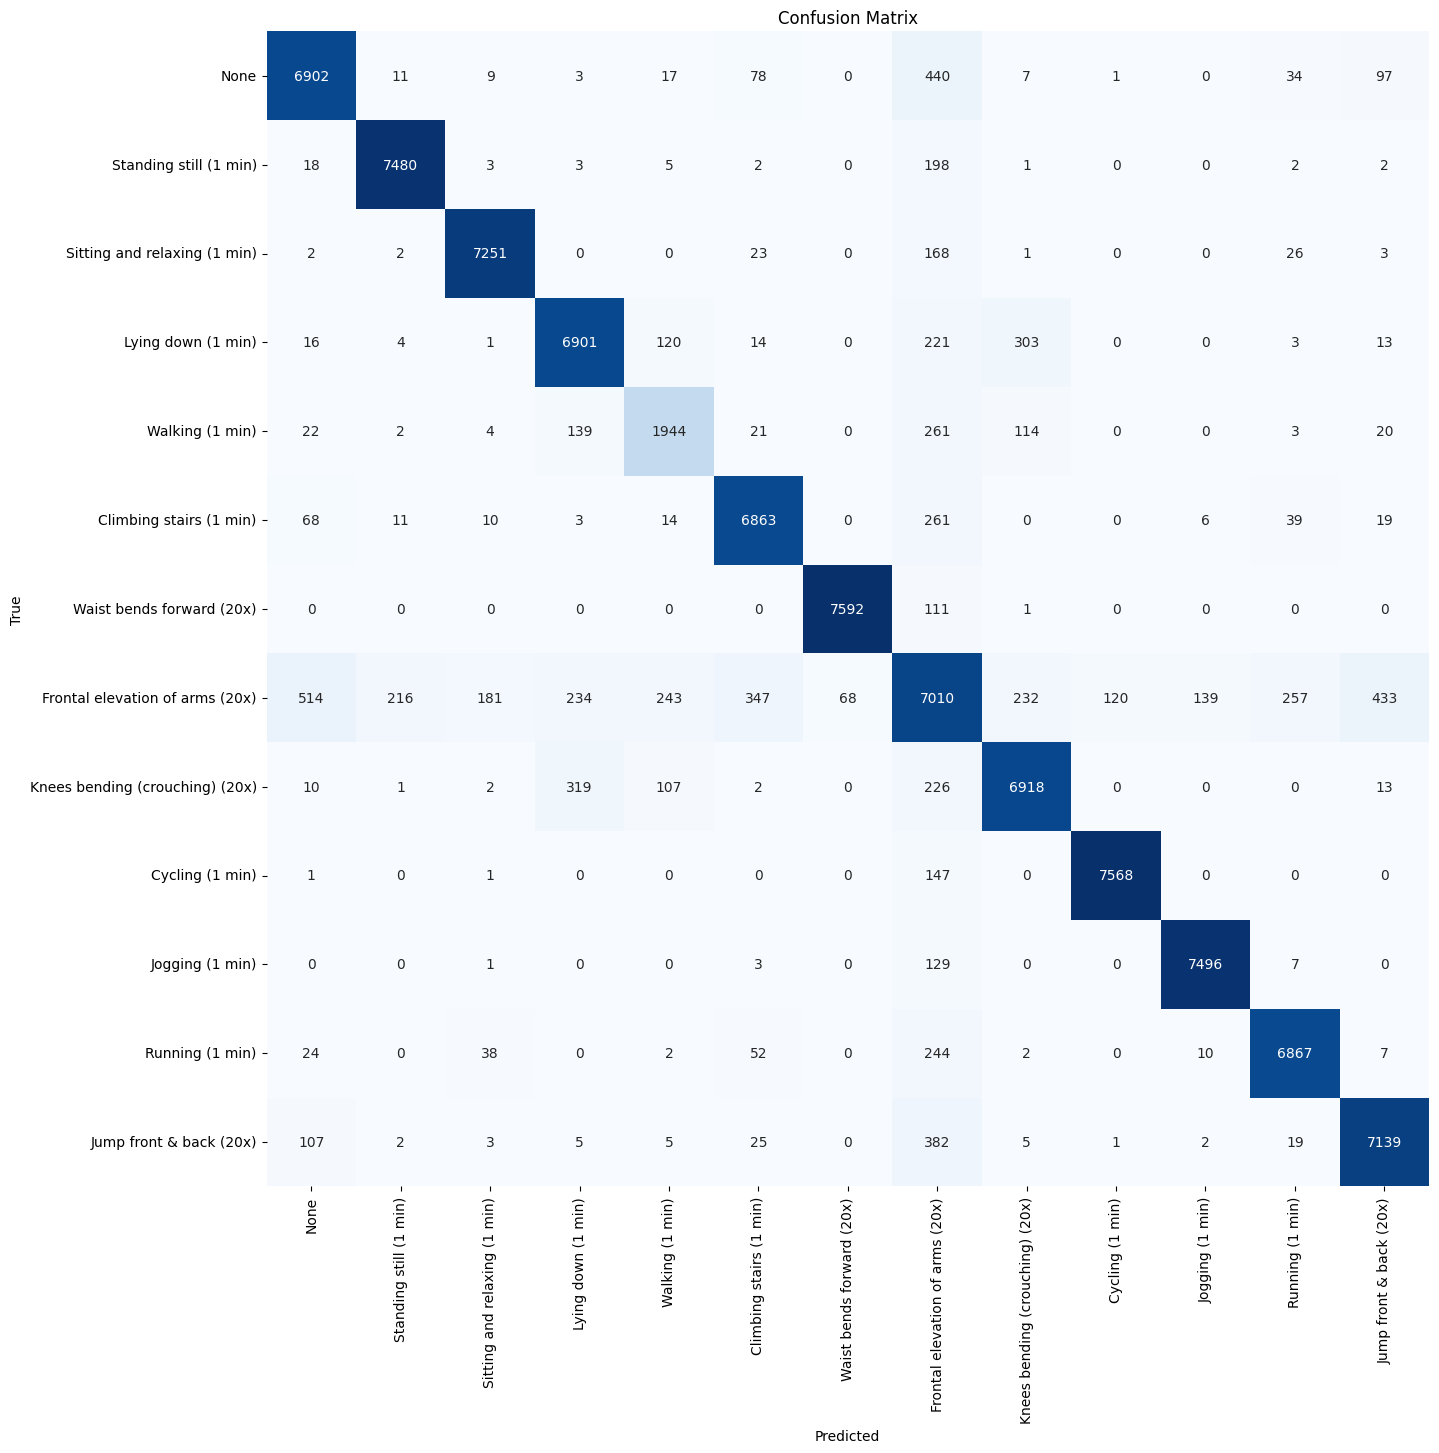

Accuracy: 0.9179
Precision (macro): 0.9157
Recall (macro): 0.9154
F1-score (macro): 0.9156

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.90      0.91      0.90      7599
         Standing still (1 min)       0.97      0.97      0.97      7714
   Sitting and relaxing (1 min)       0.97      0.97      0.97      7476
             Lying down (1 min)       0.91      0.91      0.91      7596
                Walking (1 min)       0.79      0.77      0.78      2530
        Climbing stairs (1 min)       0.92      0.94      0.93      7294
      Waist bends forward (20x)       0.99      0.99      0.99      7704
Frontal elevation of arms (20x)       0.72      0.70      0.71      9994
Knees bending (crouching) (20x)       0.91      0.91      0.91      7598
                Cycling (1 min)       0.98      0.98      0.98      7717
                Jogging (1 min)       0.98      0.98      0.98      7636
        

In [207]:
y_pred = dt_model.predict(X_test)
resultsSummarizer(y_test , y_pred)

In [208]:
# DT model : 1.1
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

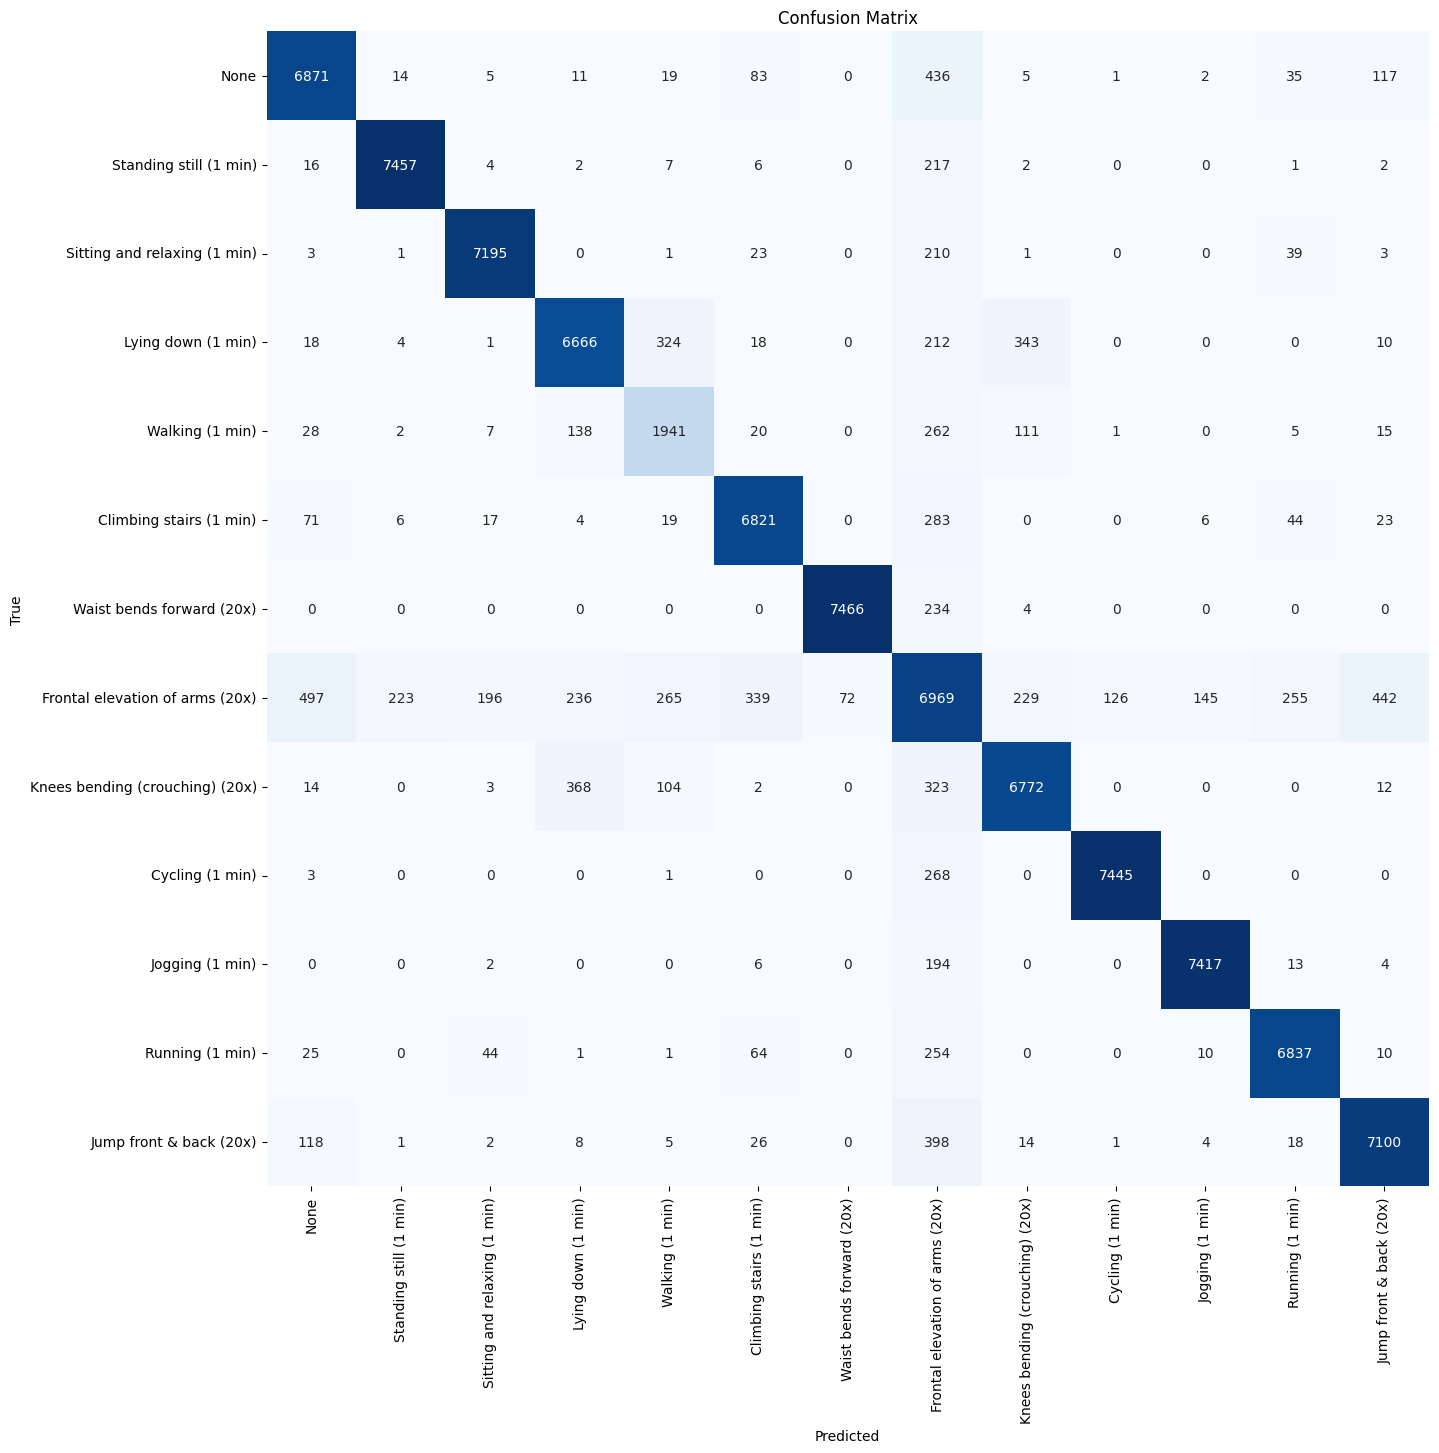

Accuracy: 0.9077
Precision (macro): 0.9048
Recall (macro): 0.9056
F1-score (macro): 0.9051

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.90      0.90      0.90      7599
         Standing still (1 min)       0.97      0.97      0.97      7714
   Sitting and relaxing (1 min)       0.96      0.96      0.96      7476
             Lying down (1 min)       0.90      0.88      0.89      7596
                Walking (1 min)       0.72      0.77      0.74      2530
        Climbing stairs (1 min)       0.92      0.94      0.93      7294
      Waist bends forward (20x)       0.99      0.97      0.98      7704
Frontal elevation of arms (20x)       0.68      0.70      0.69      9994
Knees bending (crouching) (20x)       0.91      0.89      0.90      7598
                Cycling (1 min)       0.98      0.96      0.97      7717
                Jogging (1 min)       0.98      0.97      0.97      7636
        

In [209]:
y_pred = dt_model.predict(X_test_scaled)
resultsSummarizer(y_test , y_pred)

### Random Forest Classifier

In [210]:
# RF model : 1.0 
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

RandomForestClassifier()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


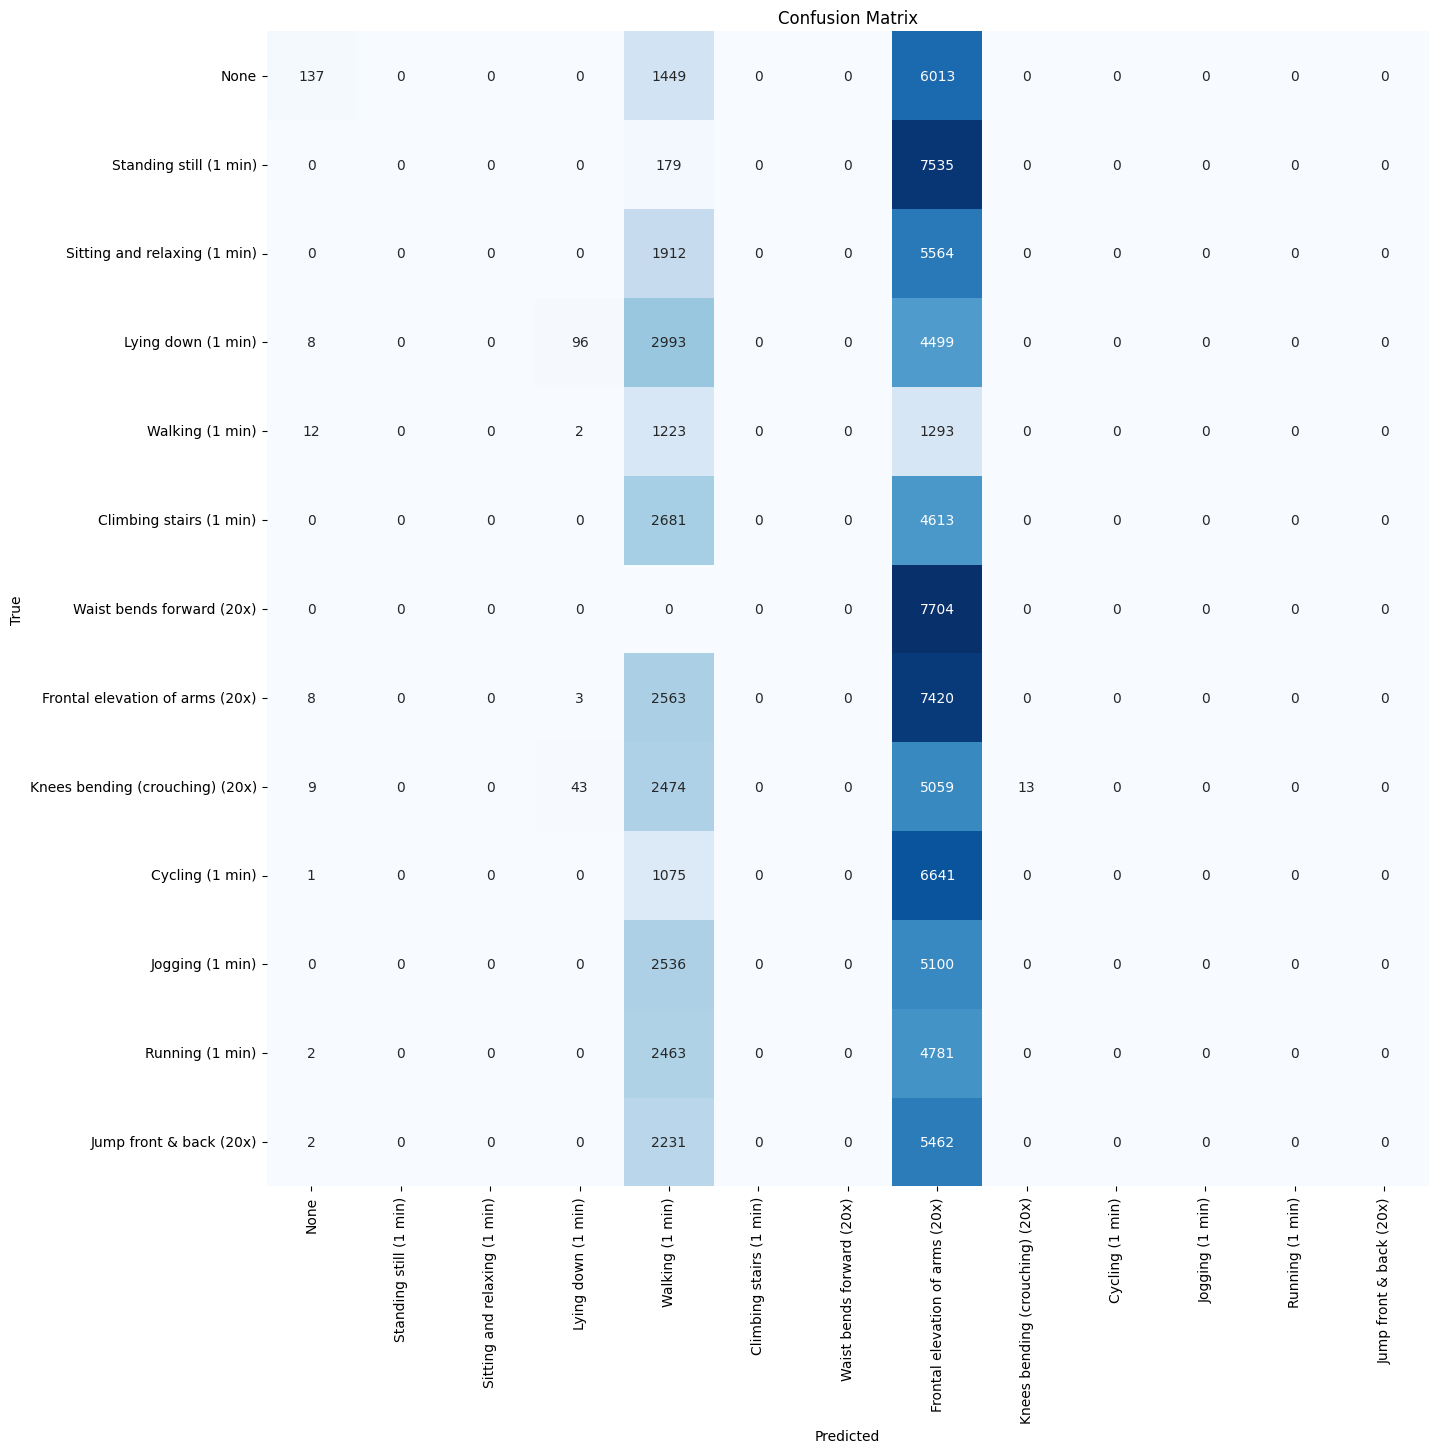

Accuracy: 0.0928
Precision (macro): 0.1990
Recall (macro): 0.0968
F1-score (macro): 0.0260

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.77      0.02      0.04      7599
         Standing still (1 min)       0.00      0.00      0.00      7714
   Sitting and relaxing (1 min)       0.00      0.00      0.00      7476
             Lying down (1 min)       0.67      0.01      0.02      7596
                Walking (1 min)       0.05      0.48      0.09      2530
        Climbing stairs (1 min)       0.00      0.00      0.00      7294
      Waist bends forward (20x)       0.00      0.00      0.00      7704
Frontal elevation of arms (20x)       0.10      0.74      0.18      9994
Knees bending (crouching) (20x)       1.00      0.00      0.00      7598
                Cycling (1 min)       0.00      0.00      0.00      7717
                Jogging (1 min)       0.00      0.00      0.00      7636
        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
y_pred = rf_model.predict(X_test_scaled)
resultsSummarizer(y_test , y_pred)

In [212]:
# RF model : 1.1
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled , y_train)

RandomForestClassifier()

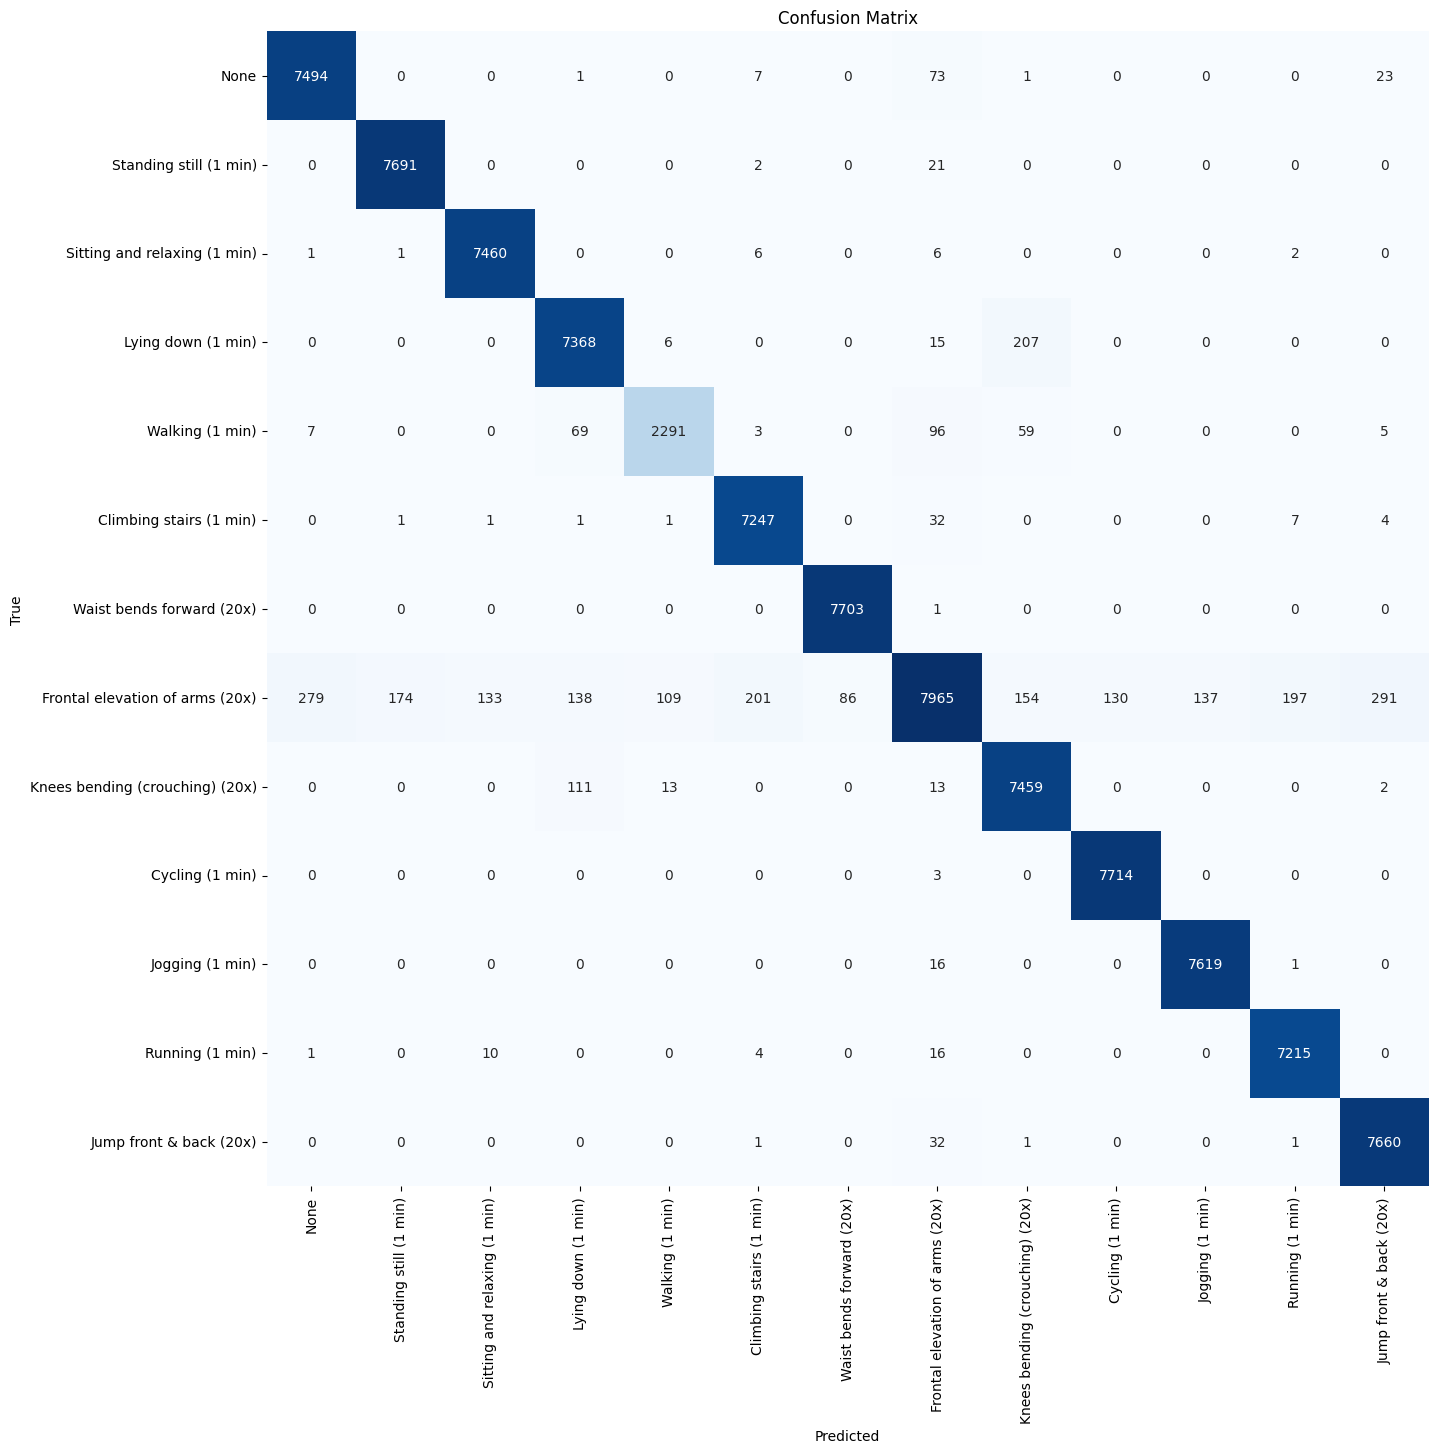

Accuracy: 0.9696
Precision (macro): 0.9685
Recall (macro): 0.9706
F1-score (macro): 0.9688

Classification Report:
                                 precision    recall  f1-score   support

                           None       0.96      0.99      0.97      7599
         Standing still (1 min)       0.98      1.00      0.99      7714
   Sitting and relaxing (1 min)       0.98      1.00      0.99      7476
             Lying down (1 min)       0.96      0.97      0.96      7596
                Walking (1 min)       0.95      0.91      0.93      2530
        Climbing stairs (1 min)       0.97      0.99      0.98      7294
      Waist bends forward (20x)       0.99      1.00      0.99      7704
Frontal elevation of arms (20x)       0.96      0.80      0.87      9994
Knees bending (crouching) (20x)       0.95      0.98      0.96      7598
                Cycling (1 min)       0.98      1.00      0.99      7717
                Jogging (1 min)       0.98      1.00      0.99      7636
        

In [213]:
y_pred = rf_model.predict(X_test_scaled)
resultsSummarizer(y_test , y_pred)